<a href="https://colab.research.google.com/github/rssurya19/comp9444/blob/main/real_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# IMPORTANT: SOME KAGGLE DATA SOURCES ARE PRIVATE
# RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES.
import kagglehub
kagglehub.login()


In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

rssurya_image_data_path = kagglehub.dataset_download('rssurya/image-data')
rssurya_json_data_path = kagglehub.dataset_download('rssurya/json-data')
rssurya_cleaned_caption_path = kagglehub.dataset_download('rssurya/cleaned-caption')

print('Data source import complete.')


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/image-data/RSICD_images/port_26.jpg
/kaggle/input/image-data/RSICD_images/industrial_169.jpg
/kaggle/input/image-data/RSICD_images/center_68.jpg
/kaggle/input/image-data/RSICD_images/storagetanks_212.jpg
/kaggle/input/image-data/RSICD_images/00767.jpg
/kaggle/input/image-data/RSICD_images/playground_264.jpg
/kaggle/input/image-data/RSICD_images/forest_205.jpg
/kaggle/input/image-data/RSICD_images/viaduct_317.jpg
/kaggle/input/image-data/RSICD_images/storagetanks_323.jpg
/kaggle/input/image-data/RSICD_images/mediumresidential_77.jpg
/kaggle/input/image-data/RSICD_images/denseresidential_223.jpg
/kaggle/input/image-data/RSICD_images/farmland_318.jpg
/kaggle/input/image-data/RSICD_images/00266.jpg
/kaggle/input/image-data/RSICD_images/center_102.jpg
/kaggle/input/image-data/RSICD_images/center_189.jpg
/kaggle/input/image-data/RSICD_images/storagetanks_197.jpg
/kaggle/input/image-data/RSICD_images/parking_332.jpg
/kaggle/input/image-data/RSICD_images/pond_317.jpg
/kaggle/inpu

In [ ]:
# Install missing packages
!pip install rouge-score

# Download NLTK data
import nltk
nltk.download('wordnet', quiet=True)
nltk.download('punkt', quiet=True)
nltk.download('omw-1.4', quiet=True)


  Preparing metadata (setup.py) ... done
  Created wheel for rouge-score: filename=rouge_score-0.1.2-py3-none-any.whl size=24934 sha256=be8d97a4a4b585d5ec3e08374bdad2112ba40154afcc5cdee3a7d6efc119438c
  Stored in directory: /root/.cache/pip/wheels/1e/19/43/8a442dc83660ca25e163e1bd1f89919284ab0d0c1475475148
Successfully built rouge-score


True

In [ ]:
!pip install evaluate
!pip install transformers # Ensure transformers is also up-to-date
!pip install accelerate # Often a dependency for transformers, good to have
!pip install datasets # Often useful for data handling in HF ecosystem
!pip install torch torchvision torchaudio
!pip install nltk
!pip install scikit-learn
!pip install pycocoevalcap

# For COCO-related metrics (CIDEr, SPICE):
!pip install pycocotools
!git clone https://github.com/tylin/coco-caption.git

# Add coco-caption/pycocoevalcap to your Python path
import sys
if 'coco-caption/pycocoevalcap' not in sys.path:
    sys.path.append('coco-caption/pycocoevalcap')
    print("Added 'coco-caption/pycocoevalcap' to Python path.")

# You may also need to install nltk data for some tokenizers used by pycocoevalcap
import nltk
try:
    nltk.download('punkt', quiet=True)
    nltk.download('wordnet', quiet=True)
    nltk.download('punkt_tab', quiet=True)
    print("NLTK data downloaded successfully")
except:
    print("NLTK download failed, but continuing...")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.6/193.6 kB 9.9 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.5.1
    Uninstalling fsspec-2025.5.1:
      Successfully uninstalled fsspec-2025.5.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 2.8.0 requires google-cloud-bigquery-storage<3.0.0,>=2.30.0, which is not installed.
cesium 0.12.4 requires numpy<3.0,>=2.0, but you have numpy 1.26.4 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cuda-cupti-cu12==12.4.127; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidi

In [ ]:
# ViT-GPT2 Image Captioning Model - Complete Kaggle Implementation
# Author: Generated for Kaggle Environment
# Description: Complete implementation with all evaluation metrics and plotting

import os
import sys
import json
import zipfile
import warnings
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from tqdm.auto import tqdm
from collections import defaultdict
import random

# PyTorch imports
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, Dataset
from torchvision import transforms

# Transformers imports
from transformers import (
    ViTImageProcessor, ViTModel,
    AutoTokenizer, GPT2LMHeadModel,
    get_scheduler
)

# Evaluation imports
import evaluate
import nltk

# Suppress warnings
warnings.filterwarnings('ignore')

# Download NLTK data
try:
    nltk.download('punkt', quiet=True)
    nltk.download('wordnet', quiet=True)
    nltk.download('punkt_tab', quiet=True)
    print("✅ NLTK data downloaded successfully")
except:
    print("⚠️ NLTK download failed, continuing...")

# Add coco-caption to path if available
if os.path.exists('coco-caption/pycocoevalcap'):
    sys.path.append('coco-caption/pycocoevalcap')
    print("✅ Added coco-caption to Python path")

# Device setup
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"🚀 Using device: {device}")

# Set random seeds for reproducibility
torch.manual_seed(42)
np.random.seed(42)
random.seed(42)
if torch.cuda.is_available():
    torch.cuda.manual_seed(42)


2025-08-02 14:07:01.902111: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1754143622.142133      36 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1754143622.208053      36 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


✅ NLTK data downloaded successfully
✅ Added coco-caption to Python path
🚀 Using device: cuda


In [ ]:

# =============================================================================
# CONFIGURATION
# =============================================================================

CONFIG = {
    'IMAGE_DIR': '/kaggle/input/image-data/RSICD_images',  # Update path
    'CAPTION_FILE': '/kaggle/input/json-data/dataset_rsicd.json',  # Update path
    'BATCH_SIZE': 8,
    'LEARNING_RATE': 5e-5,
    'NUM_EPOCHS': 15,
    'MAX_CAPTION_LENGTH': 100,
    'MAX_GENERATION_LENGTH': 30,
    'PATIENCE': 3,
    'VIT_MODEL': "google/vit-base-patch16-224",
    'GPT2_MODEL': "gpt2",
    'MODEL_SAVE_PATH': "best_image_captioning_model.pth",
    'WARMUP_RATIO': 0.1,
    'WEIGHT_DECAY': 0.01,
    'GRADIENT_CLIP_NORM': 1.0
}

# Create output directories
os.makedirs('outputs', exist_ok=True)
os.makedirs('plots', exist_ok=True)

print("📋 Configuration loaded successfully!")



📋 Configuration loaded successfully!


In [ ]:
# =============================================================================
# DATASET SPLITTING AND JSON CREATION
# =============================================================================

def create_split_datasets(caption_file, output_dir='./'):
    """Create train/val/test splits and save as JSON files"""
    print("=" * 60)
    print("📂 CREATING DATASET SPLITS AND JSON FILES")
    print("=" * 60)

    with open(caption_file, 'r') as f:
        data = json.load(f)

    print(f"📊 Total images in dataset: {len(data['images'])}")

    split_data = {
        "train": {"images": [], "annotations": [], "info": {"description": "RSICD Training Set"}},
        "val": {"images": [], "annotations": [], "info": {"description": "RSICD Validation Set"}},
        "test": {"images": [], "annotations": [], "info": {"description": "RSICD Test Set"}}
    }

    split_counts = {"train": 0, "val": 0, "test": 0}
    annotation_id_counter = 0

    for item in data['images']:
        split = item['split']
        split_counts[split] += 1

        image_entry = {
            "id": len(split_data[split]["images"]),
            "width": 256, "height": 256,
            "file_name": item['filename'],
            "original_id": item['imgid']
        }
        split_data[split]["images"].append(image_entry)

        for sentence in item['sentences']:
            annotation_entry = {
                "id": annotation_id_counter,
                "image_id": image_entry['id'],
                "caption": sentence['raw'].strip(),
                "tokens": sentence.get('tokens', sentence['raw'].split())
            }
            split_data[split]["annotations"].append(annotation_entry)
            annotation_id_counter += 1

    saved_files = {}
    for split_name, split_content in split_data.items():
        output_filename = os.path.join(output_dir, f"rsicd_{split_name}.json")
        with open(output_filename, 'w') as f:
            json.dump(split_content, f, indent=2)
        saved_files[split_name] = output_filename
        print(f"✅ {split_name}: {len(split_content['images'])} images, {len(split_content['annotations'])} captions")

    return saved_files, split_data



In [ ]:
# =============================================================================
# DATASET CLASS
# =============================================================================

class RSICDDataset(Dataset):
    """RSICD Dataset for loading images and captions"""

    def __init__(self, json_file, img_dir, processor, tokenizer, split_type="train", max_length=100):
        print(f"🔄 Initializing {split_type} dataset from {json_file}")

        self.img_dir = img_dir
        self.processor = processor
        self.tokenizer = tokenizer
        self.max_length = max_length
        self.split_type = split_type

        if self.tokenizer.pad_token is None:
            self.tokenizer.pad_token = self.tokenizer.eos_token

        with open(json_file, 'r') as f:
            self.data = json.load(f)

        self.images = self.data['images']
        self.annotations = self.data['annotations']

        # Create mappings
        self.image_id_to_captions = defaultdict(list)
        for ann in self.annotations:
            self.image_id_to_captions[ann['image_id']].append(ann['caption'])

        self.image_id_to_filename = {img['id']: img['file_name'] for img in self.images}

        # Create samples
        self.samples = []
        for ann in self.annotations:
            img_filename = self.image_id_to_filename[ann['image_id']]
            self.samples.append((img_filename, ann['caption'], ann['image_id']))

        print(f"✅ Loaded {len(self.samples)} samples from {len(self.images)} unique images")

    def __len__(self):
        return len(self.samples)

    def __getitem__(self, idx):
        img_filename, caption, image_id = self.samples[idx]
        img_path = os.path.join(self.img_dir, img_filename)

        try:
            image = Image.open(img_path).convert("RGB")
        except Exception as e:
            print(f"⚠️ Error loading {img_path}: {e}")
            image = Image.new('RGB', (224, 224), (0, 0, 0))

        pixel_values = self.processor(images=image, return_tensors="pt").pixel_values.squeeze(0)

        caption_encoding = self.tokenizer(
            caption, max_length=self.max_length, padding="max_length",
            truncation=True, return_tensors="pt"
        )
        caption_tokens = caption_encoding.input_ids.squeeze(0)

        return {
            'pixel_values': pixel_values,
            'caption_tokens': caption_tokens,
            'caption_text': caption,
            'image_filename': img_filename,
            'image_id': image_id
        }

    def get_image_captions(self, image_id):
        return self.image_id_to_captions[image_id]



In [ ]:
# =============================================================================
# VIT-GPT2 MODEL
# =============================================================================

class ViTGPT2Model(nn.Module):
    """ViT + GPT-2 Model for Image Captioning"""

    def __init__(self, vit_model_name="google/vit-base-patch16-224", gpt2_model_name="gpt2"):
        super(ViTGPT2Model, self).__init__()

        print("🏗️ Initializing ViT-GPT2 Model...")

        self.vit = ViTModel.from_pretrained(vit_model_name)
        self.gpt2 = GPT2LMHeadModel.from_pretrained(gpt2_model_name)
        self.processor = ViTImageProcessor.from_pretrained(vit_model_name)
        self.tokenizer = AutoTokenizer.from_pretrained(gpt2_model_name)

        if self.tokenizer.pad_token is None:
            self.tokenizer.pad_token = self.tokenizer.eos_token
        if self.gpt2.config.pad_token_id is None:
            self.gpt2.config.pad_token_id = self.gpt2.config.eos_token_id

        # Add special tokens
        special_tokens = {
            "bos_token": "<|startoftext|>",
            "additional_special_tokens": ["<|image|>"]
        }
        self.tokenizer.add_special_tokens(special_tokens)
        self.gpt2.resize_token_embeddings(len(self.tokenizer))

        self.bos_token_id = self.tokenizer.bos_token_id
        self.image_token_id = self.tokenizer.convert_tokens_to_ids("<|image|>")

        # Projection layer
        self.image_projection = nn.Sequential(
            nn.Linear(self.vit.config.hidden_size, self.gpt2.config.hidden_size),
            nn.LayerNorm(self.gpt2.config.hidden_size),
            nn.Dropout(0.1)
        )

        self.image_pooling = nn.AdaptiveAvgPool1d(1)

        print(f"✅ Model initialized: ViT ({self.vit.config.hidden_size}D) -> GPT-2 ({self.gpt2.config.hidden_size}D)")
        print(f"✅ Vocabulary size: {len(self.tokenizer)}")

    def forward(self, pixel_values, caption_tokens=None):
        batch_size = pixel_values.shape[0]
        device = pixel_values.device

        # Extract image features
        vit_outputs = self.vit(pixel_values=pixel_values)
        image_features = vit_outputs.last_hidden_state

        # Pool and project features
        pooled_features = self.image_pooling(image_features.transpose(1, 2)).transpose(1, 2)
        image_embeds = self.image_projection(pooled_features)

        if caption_tokens is not None:
            # Training mode
            image_token_ids = torch.full((batch_size, 1), self.image_token_id,
                                       dtype=torch.long, device=device)
            combined_tokens = torch.cat([image_token_ids, caption_tokens], dim=1)

            text_embeds = self.gpt2.transformer.wte(combined_tokens)
            text_embeds[:, 0:1, :] = image_embeds

            image_mask = torch.ones(batch_size, 1, dtype=torch.long, device=device)
            text_mask = (caption_tokens != self.tokenizer.pad_token_id).long()
            attention_mask = torch.cat([image_mask, text_mask], dim=1)

            image_labels = torch.full((batch_size, 1), -100, dtype=torch.long, device=device)
            combined_labels = torch.cat([image_labels, caption_tokens], dim=1)

            outputs = self.gpt2(
                inputs_embeds=text_embeds,
                attention_mask=attention_mask,
                labels=combined_labels
            )
            return outputs
        else:
            return image_embeds

    def generate_caption(self, pixel_values, max_length=50, num_beams=3,
                        do_sample=False, temperature=1.0, top_p=0.9):
        """Generate captions for images"""
        self.eval()
        device = pixel_values.device
        batch_size = pixel_values.shape[0]

        with torch.no_grad():
            image_embeds = self.forward(pixel_values)
            generated_captions = []

            for i in range(batch_size):
                current_image_embed = image_embeds[i:i+1]

                start_token = self.bos_token_id if self.bos_token_id is not None else self.image_token_id
                input_ids = torch.tensor([[start_token]], device=device)
                generated_tokens = []

                current_embeds = torch.cat([
                    current_image_embed,
                    self.gpt2.transformer.wte(input_ids)
                ], dim=1)

                for step in range(max_length):
                    outputs = self.gpt2(inputs_embeds=current_embeds)
                    next_token_logits = outputs.logits[0, -1, :]

                    if do_sample and temperature > 0:
                        next_token_logits = next_token_logits / temperature

                        if top_p < 1.0:
                            sorted_logits, sorted_indices = torch.sort(next_token_logits, descending=True)
                            cumulative_probs = torch.cumsum(F.softmax(sorted_logits, dim=-1), dim=-1)
                            sorted_indices_to_remove = cumulative_probs > top_p
                            sorted_indices_to_remove[1:] = sorted_indices_to_remove[:-1].clone()
                            sorted_indices_to_remove[0] = 0
                            indices_to_remove = sorted_indices[sorted_indices_to_remove]
                            next_token_logits[indices_to_remove] = float('-inf')

                        probs = F.softmax(next_token_logits, dim=-1)
                        next_token = torch.multinomial(probs, num_samples=1)
                    else:
                        next_token = torch.argmax(next_token_logits, dim=-1, keepdim=True)

                    if next_token.item() == self.tokenizer.eos_token_id:
                        break
                    if next_token.item() == self.tokenizer.pad_token_id:
                        continue

                    generated_tokens.append(next_token.item())

                    next_token_embed = self.gpt2.transformer.wte(next_token.unsqueeze(0))
                    current_embeds = torch.cat([current_embeds, next_token_embed], dim=1)

                    if current_embeds.shape[1] > 100:
                        current_embeds = current_embeds[:, -50:, :]

                if generated_tokens:
                    caption = self.tokenizer.decode(generated_tokens, skip_special_tokens=True)
                    caption = caption.strip()
                else:
                    caption = "a satellite image"

                generated_captions.append(caption)

        return generated_captions



In [ ]:
# =============================================================================
# EVALUATION METRICS CLASS
# =============================================================================

class EvaluationMetrics:
    """Comprehensive evaluation metrics for image captioning"""

    def __init__(self):
        print("🔧 Initializing evaluation metrics...")

        try:
            self.bleu_metric = evaluate.load("bleu")
            self.meteor_metric = evaluate.load("meteor")
            self.rouge_metric = evaluate.load("rouge")
            print("✅ Hugging Face metrics loaded successfully")
        except Exception as e:
            print(f"⚠️ Could not load some metrics: {e}")
            self.bleu_metric = None
            self.meteor_metric = None
            self.rouge_metric = None

    def compute_bleu_scores(self, predictions, references):
        """Compute BLEU 1-4 scores"""
        bleu_scores = {'bleu_1': 0, 'bleu_2': 0, 'bleu_3': 0, 'bleu_4': 0}

        if self.bleu_metric is None:
            return bleu_scores

        try:
            for n in range(1, 5):
                score = self.bleu_metric.compute(
                    predictions=predictions,
                    references=references,
                    max_order=n
                )['bleu']
                bleu_scores[f'bleu_{n}'] = score
        except Exception as e:
            print(f"⚠️ Error computing BLEU scores: {e}")

        return bleu_scores

    def compute_meteor_score(self, predictions, references):
        """Compute METEOR score"""
        if self.meteor_metric is None:
            return 0.0

        try:
            return self.meteor_metric.compute(
                predictions=predictions,
                references=references
            )['meteor']
        except Exception as e:
            print(f"⚠️ Error computing METEOR: {e}")
            return 0.0

    def compute_rouge_l_score(self, predictions, references):
        """Compute ROUGE-L score"""
        if self.rouge_metric is None:
            return 0.0

        try:
            return self.rouge_metric.compute(
                predictions=predictions,
                references=references,
                rouge_types=['rougeL']
            )['rougeL']
        except Exception as e:
            print(f"⚠️ Error computing ROUGE-L: {e}")
            return 0.0

    def compute_coco_metrics(self, predictions_dict, references_dict):
        """Compute CIDEr and SPICE using COCO evaluation tools"""
        metrics = {'cider': 0.0, 'spice': 0.0}

        try:
            # Check if COCO evaluation tools are available
            from pycocotools.coco import COCO
            from pycocoevalcap.eval import COCOEvalCap

            # Prepare data in COCO format
            ground_truth = {
                "annotations": [],
                "images": [],
                "info": {"description": "Ground truth captions"}
            }

            results = []
            ann_id = 0

            for image_id, ref_captions in references_dict.items():
                ground_truth["images"].append({
                    "id": image_id,
                    "width": 256,
                    "height": 256,
                    "file_name": f"image_{image_id}.jpg"
                })

                for ref_caption in ref_captions:
                    ground_truth["annotations"].append({
                        "id": ann_id,
                        "image_id": image_id,
                        "caption": ref_caption.strip()
                    })
                    ann_id += 1

                if image_id in predictions_dict:
                    results.append({
                        "image_id": image_id,
                        "caption": predictions_dict[image_id].strip()
                    })

            # Save temporary files
            gt_file = "temp_gt.json"
            res_file = "temp_res.json"

            with open(gt_file, 'w') as f:
                json.dump(ground_truth, f)
            with open(res_file, 'w') as f:
                json.dump(results, f)

            # Evaluate
            coco = COCO(gt_file)
            coco_result = coco.loadRes(res_file)
            coco_eval = COCOEvalCap(coco, coco_result)
            coco_eval.params['image_id'] = coco_result.getImgIds()
            coco_eval.evaluate()

            metrics['cider'] = coco_eval.eval.get('CIDEr', 0.0)
            metrics['spice'] = coco_eval.eval.get('SPICE', 0.0)

            # Clean up
            os.remove(gt_file)
            os.remove(res_file)

        except Exception as e:
            print(f"⚠️ Error computing COCO metrics: {e}")

        return metrics

    def evaluate_model(self, model, dataloader, max_samples=None):
        """Comprehensive model evaluation"""
        print("🔍 Starting comprehensive evaluation...")

        model.eval()
        predictions = []
        references = []
        predictions_dict = {}
        references_dict = {}

        sample_count = 0
        max_samples = max_samples or len(dataloader.dataset)

        with torch.no_grad():
            for batch_idx, batch in enumerate(tqdm(dataloader, desc="Evaluating")):
                if sample_count >= max_samples:
                    break

                pixel_values = batch['pixel_values'].to(device)
                image_ids = batch['image_ids']

                generated_captions = model.generate_caption(
                    pixel_values,
                    max_length=CONFIG['MAX_GENERATION_LENGTH'],
                    do_sample=False
                )

                for i, (gen_cap, img_id) in enumerate(zip(generated_captions, image_ids)):
                    ref_captions = dataloader.dataset.get_image_captions(img_id)

                    predictions.append(gen_cap)
                    references.append(ref_captions)
                    predictions_dict[img_id] = gen_cap
                    references_dict[img_id] = ref_captions

                    sample_count += 1
                    if sample_count >= max_samples:
                        break

        print(f"📊 Evaluated {sample_count} samples")

        # Compute all metrics
        print("📈 Computing BLEU scores...")
        bleu_scores = self.compute_bleu_scores(predictions, references)

        print("📈 Computing METEOR score...")
        meteor_score = self.compute_meteor_score(predictions, references)

        print("📈 Computing ROUGE-L score...")
        rouge_l_score = self.compute_rouge_l_score(predictions, references)

        print("📈 Computing CIDEr and SPICE scores...")
        coco_metrics = self.compute_coco_metrics(predictions_dict, references_dict)

        all_metrics = {
            **bleu_scores,
            'meteor': meteor_score,
            'rouge_l': rouge_l_score,
            **coco_metrics
        }

        return all_metrics, predictions[:10], references[:10]



In [ ]:
# =============================================================================
# TRAINING FUNCTION
# =============================================================================

def train_model():
    """Main training function with all metrics and early stopping"""
    print("🚀 Starting ViT-GPT2 model training...")

    # Initialize model
    model = ViTGPT2Model(
        vit_model_name=CONFIG['VIT_MODEL'],
        gpt2_model_name=CONFIG['GPT2_MODEL']
    ).to(device)

    # Initialize optimizer with different learning rates
    optimizer = torch.optim.AdamW([
        {'params': model.vit.parameters(), 'lr': CONFIG['LEARNING_RATE'] * 0.1},
        {'params': model.gpt2.parameters(), 'lr': CONFIG['LEARNING_RATE'] * 0.5},
        {'params': model.image_projection.parameters(), 'lr': CONFIG['LEARNING_RATE']}
    ], weight_decay=CONFIG['WEIGHT_DECAY'])

    num_training_steps = CONFIG['NUM_EPOCHS'] * len(train_dataloader)
    num_warmup_steps = int(CONFIG['WARMUP_RATIO'] * num_training_steps)

    scheduler = get_scheduler(
        name="cosine_with_restarts",
        optimizer=optimizer,
        num_warmup_steps=num_warmup_steps,
        num_training_steps=num_training_steps
    )

    # Training tracking
    training_history = {
        'train_losses': [], 'val_losses': [], 'learning_rates': [],
        'bleu_1_scores': [], 'bleu_2_scores': [], 'bleu_3_scores': [], 'bleu_4_scores': [],
        'meteor_scores': [], 'rouge_l_scores': [], 'cider_scores': [], 'spice_scores': []
    }

    # Early stopping
    best_val_loss = float('inf')
    best_bleu4_score = 0.0
    patience_counter = 0
    best_epoch = 0

    print(f"📋 Training configuration:")
    print(f"  Epochs: {CONFIG['NUM_EPOCHS']}")
    print(f"  Batch size: {CONFIG['BATCH_SIZE']}")
    print(f"  Learning rate: {CONFIG['LEARNING_RATE']}")
    print(f"  Warmup steps: {num_warmup_steps}")

    # Training loop
    for epoch in range(CONFIG['NUM_EPOCHS']):
        print(f"\n{'='*60}")
        print(f"🔄 EPOCH {epoch+1}/{CONFIG['NUM_EPOCHS']}")
        print(f"{'='*60}")

        # Training phase
        model.train()
        total_train_loss = 0.0
        num_train_batches = 0

        train_pbar = tqdm(train_dataloader, desc=f"Training Epoch {epoch+1}")

        for batch_idx, batch in enumerate(train_pbar):
            try:
                pixel_values = batch['pixel_values'].to(device)
                caption_tokens = batch['caption_tokens'].to(device)

                outputs = model(pixel_values=pixel_values, caption_tokens=caption_tokens)
                loss = outputs.loss

                loss.backward()
                torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
                optimizer.step()
                scheduler.step()
                optimizer.zero_grad()

                total_train_loss += loss.item()
                num_train_batches += 1

                current_lr = scheduler.get_last_lr()[0]
                train_pbar.set_postfix({
                    'loss': f"{loss.item():.4f}",
                    'lr': f"{current_lr:.2e}"
                })

            except Exception as e:
                print(f"⚠️ Error in training batch {batch_idx}: {e}")
                continue

        avg_train_loss = total_train_loss / max(num_train_batches, 1)
        training_history['train_losses'].append(avg_train_loss)
        training_history['learning_rates'].append(scheduler.get_last_lr()[0])

        # Validation phase
        model.eval()
        total_val_loss = 0.0
        num_val_batches = 0

        val_pbar = tqdm(val_dataloader, desc=f"Validation Epoch {epoch+1}")

        with torch.no_grad():
            for batch_idx, batch in enumerate(val_pbar):
                try:
                    pixel_values = batch['pixel_values'].to(device)
                    caption_tokens = batch['caption_tokens'].to(device)

                    outputs = model(pixel_values=pixel_values, caption_tokens=caption_tokens)
                    loss = outputs.loss

                    total_val_loss += loss.item()
                    num_val_batches += 1

                    val_pbar.set_postfix({'loss': f"{loss.item():.4f}"})

                except Exception as e:
                    print(f"⚠️ Error in validation batch {batch_idx}: {e}")
                    continue

        avg_val_loss = total_val_loss / max(num_val_batches, 1)
        training_history['val_losses'].append(avg_val_loss)

        # Evaluation metrics
        print(f"\n📊 Computing evaluation metrics...")
        try:
            metrics, sample_preds, sample_refs = evaluator.evaluate_model(
                model, val_dataloader, max_samples=500
            )

            # Store all metrics
            training_history['bleu_1_scores'].append(metrics['bleu_1'])
            training_history['bleu_2_scores'].append(metrics['bleu_2'])
            training_history['bleu_3_scores'].append(metrics['bleu_3'])
            training_history['bleu_4_scores'].append(metrics['bleu_4'])
            training_history['meteor_scores'].append(metrics['meteor'])
            training_history['rouge_l_scores'].append(metrics['rouge_l'])
            training_history['cider_scores'].append(metrics['cider'])
            training_history['spice_scores'].append(metrics['spice'])

            # Print metrics
            print(f"\n📈 Epoch {epoch+1} Results:")
            print(f"  Training Loss: {avg_train_loss:.4f}")
            print(f"  Validation Loss: {avg_val_loss:.4f}")
            print(f"  BLEU-1: {metrics['bleu_1']:.4f}")
            print(f"  BLEU-2: {metrics['bleu_2']:.4f}")
            print(f"  BLEU-3: {metrics['bleu_3']:.4f}")
            print(f"  BLEU-4: {metrics['bleu_4']:.4f}")
            print(f"  METEOR: {metrics['meteor']:.4f}")
            print(f"  ROUGE-L: {metrics['rouge_l']:.4f}")
            print(f"  CIDEr: {metrics['cider']:.4f}")
            print(f"  SPICE: {metrics['spice']:.4f}")

            # Print sample predictions
            print(f"\n💭 Sample Predictions:")
            for i in range(min(3, len(sample_preds))):
                print(f"  Generated: {sample_preds[i]}")
                print(f"  Reference: {sample_refs[i][0] if sample_refs[i] else 'N/A'}")
                print()

        except Exception as e:
            print(f"⚠️ Error during evaluation: {e}")
            # Add default values if evaluation fails
            for metric in ['bleu_1', 'bleu_2', 'bleu_3', 'bleu_4', 'meteor', 'rouge_l', 'cider', 'spice']:
                training_history[f'{metric}_scores'].append(0.0)
            metrics = {'bleu_4': 0.0}

        # Early stopping logic
        current_bleu4 = metrics.get('bleu_4', 0.0)

        if current_bleu4 > best_bleu4_score:
            best_bleu4_score = current_bleu4
            best_val_loss = avg_val_loss
            best_epoch = epoch + 1
            patience_counter = 0

            # Save best model
            checkpoint = {
                'epoch': epoch + 1,
                'model_state_dict': model.state_dict(),
                'optimizer_state_dict': optimizer.state_dict(),
                'scheduler_state_dict': scheduler.state_dict(),
                'best_bleu4': float(best_bleu4_score),
                'best_val_loss': float(best_val_loss),
                'train_losses': [float(x) for x in training_history['train_losses']],
                'val_losses': [float(x) for x in training_history['val_losses']],
                'metrics': {k: float(v) for k, v in metrics.items()},
                'config': CONFIG
            }

            torch.save(checkpoint, CONFIG['MODEL_SAVE_PATH'])
            print(f"💾 Saved best model with BLEU-4: {best_bleu4_score:.4f}")

        else:
            patience_counter += 1
            print(f"⏳ No improvement for {patience_counter} epochs (best BLEU-4: {best_bleu4_score:.4f})")

            if patience_counter >= CONFIG['PATIENCE']:
                print(f"\n🛑 Early stopping triggered after {epoch + 1} epochs!")
                print(f"🏆 Best epoch: {best_epoch} with BLEU-4: {best_bleu4_score:.4f}")
                break

    print(f"\n🎉 Training completed!")
    print(f"🏆 Best model saved at epoch {best_epoch} with BLEU-4: {best_bleu4_score:.4f}")

    # Add final summary to training history
    training_history.update({
        'best_epoch': best_epoch,
        'best_bleu4': best_bleu4_score,
        'total_epochs': len(training_history['train_losses'])
    })

    return model, training_history



In [ ]:
# =============================================================================
# PLOTTING FUNCTIONS
# =============================================================================

def plot_training_curves(training_history):
    """Plot comprehensive training curves with all metrics"""
    print("📊 Creating comprehensive training curves...")

    epochs = range(1, len(training_history['train_losses']) + 1)

    # Create comprehensive figure
    fig, axes = plt.subplots(3, 3, figsize=(20, 15))
    fig.suptitle('ViT-GPT2 Training Progress and Evaluation Metrics', fontsize=16, fontweight='bold')

    # 1. Loss curves
    axes[0, 0].plot(epochs, training_history['train_losses'], 'b-', label='Training Loss', linewidth=2, marker='o')
    axes[0, 0].plot(epochs, training_history['val_losses'], 'r-', label='Validation Loss', linewidth=2, marker='s')
    axes[0, 0].set_title('Training and Validation Loss', fontweight='bold')
    axes[0, 0].set_xlabel('Epoch')
    axes[0, 0].set_ylabel('Loss')
    axes[0, 0].legend()
    axes[0, 0].grid(True, alpha=0.3)

    # 2. Learning rate
    axes[0, 1].plot(epochs, training_history['learning_rates'], 'g-', linewidth=2, marker='^')
    axes[0, 1].set_title('Learning Rate Schedule', fontweight='bold')
    axes[0, 1].set_xlabel('Epoch')
    axes[0, 1].set_ylabel('Learning Rate')
    axes[0, 1].set_yscale('log')
    axes[0, 1].grid(True, alpha=0.3)

    # 3. BLEU scores
    axes[0, 2].plot(epochs, training_history['bleu_1_scores'], 'purple', label='BLEU-1', linewidth=2, marker='o')
    axes[0, 2].plot(epochs, training_history['bleu_2_scores'], 'orange', label='BLEU-2', linewidth=2, marker='s')
    axes[0, 2].plot(epochs, training_history['bleu_3_scores'], 'brown', label='BLEU-3', linewidth=2, marker='^')
    axes[0, 2].plot(epochs, training_history['bleu_4_scores'], 'red', label='BLEU-4', linewidth=2, marker='d')
    axes[0, 2].set_title('BLEU Scores (1-4)', fontweight='bold')
    axes[0, 2].set_xlabel('Epoch')
    axes[0, 2].set_ylabel('BLEU Score')
    axes[0, 2].legend()
    axes[0, 2].grid(True, alpha=0.3)

    # 4. METEOR score
    axes[1, 0].plot(epochs, training_history['meteor_scores'], 'cyan', linewidth=2, marker='o')
    axes[1, 0].set_title('METEOR Score', fontweight='bold')
    axes[1, 0].set_xlabel('Epoch')
    axes[1, 0].set_ylabel('METEOR Score')
    axes[1, 0].grid(True, alpha=0.3)

    # 5. ROUGE-L score
    axes[1, 1].plot(epochs, training_history['rouge_l_scores'], 'magenta', linewidth=2, marker='s')
    axes[1, 1].set_title('ROUGE-L Score', fontweight='bold')
    axes[1, 1].set_xlabel('Epoch')
    axes[1, 1].set_ylabel('ROUGE-L Score')
    axes[1, 1].grid(True, alpha=0.3)

    # 6. CIDEr score
    axes[1, 2].plot(epochs, training_history['cider_scores'], 'navy', linewidth=2, marker='^')
    axes[1, 2].set_title('CIDEr Score', fontweight='bold')
    axes[1, 2].set_xlabel('Epoch')
    axes[1, 2].set_ylabel('CIDEr Score')
    axes[1, 2].grid(True, alpha=0.3)

    # 7. SPICE score
    axes[2, 0].plot(epochs, training_history['spice_scores'], 'darkgreen', linewidth=2, marker='d')
    axes[2, 0].set_title('SPICE Score', fontweight='bold')
    axes[2, 0].set_xlabel('Epoch')
    axes[2, 0].set_ylabel('SPICE Score')
    axes[2, 0].grid(True, alpha=0.3)

    # 8. Combined metrics comparison (normalized)
    def normalize_scores(scores):
        if not scores or max(scores) == 0:
            return scores
        return [s / max(scores) for s in scores]

    norm_bleu4 = normalize_scores(training_history['bleu_4_scores'])
    norm_meteor = normalize_scores(training_history['meteor_scores'])
    norm_rouge = normalize_scores(training_history['rouge_l_scores'])
    norm_cider = normalize_scores(training_history['cider_scores'])

    axes[2, 1].plot(epochs, norm_bleu4, label='BLEU-4 (norm)', linewidth=2, marker='o')
    axes[2, 1].plot(epochs, norm_meteor, label='METEOR (norm)', linewidth=2, marker='s')
    axes[2, 1].plot(epochs, norm_rouge, label='ROUGE-L (norm)', linewidth=2, marker='^')
    axes[2, 1].plot(epochs, norm_cider, label='CIDEr (norm)', linewidth=2, marker='d')
    axes[2, 1].set_title('Normalized Metrics Comparison', fontweight='bold')
    axes[2, 1].set_xlabel('Epoch')
    axes[2, 1].set_ylabel('Normalized Score')
    axes[2, 1].legend()
    axes[2, 1].grid(True, alpha=0.3)

    # 9. Training summary
    axes[2, 2].axis('off')
    summary_text = f"""
Training Summary:

Best Epoch: {training_history['best_epoch']}
Best BLEU-4: {training_history['best_bleu4']:.4f}

Final Scores:
BLEU-1: {training_history['bleu_1_scores'][-1]:.4f}
BLEU-2: {training_history['bleu_2_scores'][-1]:.4f}
BLEU-3: {training_history['bleu_3_scores'][-1]:.4f}
BLEU-4: {training_history['bleu_4_scores'][-1]:.4f}
METEOR: {training_history['meteor_scores'][-1]:.4f}
ROUGE-L: {training_history['rouge_l_scores'][-1]:.4f}
CIDEr: {training_history['cider_scores'][-1]:.4f}
SPICE: {training_history['spice_scores'][-1]:.4f}

Total Epochs: {training_history['total_epochs']}
    """
    axes[2, 2].text(0.1, 0.5, summary_text, fontsize=11, verticalalignment='center',
                    bbox=dict(boxstyle="round,pad=0.5", facecolor="lightgray", alpha=0.8))

    plt.tight_layout()
    plt.savefig('plots/comprehensive_training_curves.png', dpi=300, bbox_inches='tight')
    plt.show()

    print("✅ Comprehensive training curves saved to 'plots/comprehensive_training_curves.png'")

def plot_loss_curves(training_history):
    """Plot detailed loss curves"""
    print("📊 Creating detailed loss curves...")

    epochs = range(1, len(training_history['train_losses']) + 1)

    plt.figure(figsize=(15, 5))

    # Loss curves
    plt.subplot(1, 3, 1)
    plt.plot(epochs, training_history['train_losses'], 'b-', label='Training Loss', linewidth=2, marker='o')
    plt.plot(epochs, training_history['val_losses'], 'r-', label='Validation Loss', linewidth=2, marker='s')
    plt.title('Training and Validation Loss', fontsize=14, fontweight='bold')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True, alpha=0.3)

    # Loss difference (overfitting monitor)
    plt.subplot(1, 3, 2)
    loss_diff = [v - t for t, v in zip(training_history['train_losses'], training_history['val_losses'])]
    plt.plot(epochs, loss_diff, 'g-', label='Val - Train Loss', linewidth=2, marker='^')
    plt.title('Overfitting Monitor', fontsize=14, fontweight='bold')
    plt.xlabel('Epoch')
    plt.ylabel('Loss Difference')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.axhline(y=0, color='k', linestyle='--', alpha=0.5)

    # Learning rate
    plt.subplot(1, 3, 3)
    plt.plot(epochs, training_history['learning_rates'], 'purple', linewidth=2, marker='d')
    plt.title('Learning Rate Schedule', fontsize=14, fontweight='bold')
    plt.xlabel('Epoch')
    plt.ylabel('Learning Rate')
    plt.yscale('log')
    plt.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.savefig('plots/detailed_loss_curves.png', dpi=300, bbox_inches='tight')
    plt.show()

    print("✅ Detailed loss curves saved to 'plots/detailed_loss_curves.png'")

def plot_accuracy_curves(training_history):
    """Plot accuracy/evaluation metric curves"""
    print("📊 Creating accuracy curves...")

    epochs = range(1, len(training_history['train_losses']) + 1)

    plt.figure(figsize=(20, 10))

    # BLEU scores
    plt.subplot(2, 4, 1)
    plt.plot(epochs, training_history['bleu_1_scores'], 'purple', label='BLEU-1', linewidth=2, marker='o')
    plt.plot(epochs, training_history['bleu_2_scores'], 'orange', label='BLEU-2', linewidth=2, marker='s')
    plt.plot(epochs, training_history['bleu_3_scores'], 'brown', label='BLEU-3', linewidth=2, marker='^')
    plt.plot(epochs, training_history['bleu_4_scores'], 'red', label='BLEU-4', linewidth=2, marker='d')
    plt.title('BLEU Scores', fontweight='bold')
    plt.xlabel('Epoch')
    plt.ylabel('BLEU Score')
    plt.legend()
    plt.grid(True, alpha=0.3)

    # Individual metric plots
    metrics = [
        ('bleu_4_scores', 'BLEU-4 Score', 'red'),
        ('meteor_scores', 'METEOR Score', 'cyan'),
        ('rouge_l_scores', 'ROUGE-L Score', 'magenta'),
        ('cider_scores', 'CIDEr Score', 'navy'),
        ('spice_scores', 'SPICE Score', 'darkgreen')
    ]

    for i, (metric_key, title, color) in enumerate(metrics, 2):
        plt.subplot(2, 4, i)
        plt.plot(epochs, training_history[metric_key], color, linewidth=2, marker='o')
        plt.title(title, fontweight='bold')
        plt.xlabel('Epoch')
        plt.ylabel('Score')
        plt.grid(True, alpha=0.3)

    # Combined normalized view
    plt.subplot(2, 4, 7)
    def normalize_scores(scores):
        if not scores or max(scores) == 0:
            return scores
        return [s / max(scores) for s in scores]

    plt.plot(epochs, normalize_scores(training_history['bleu_4_scores']), label='BLEU-4', linewidth=2)
    plt.plot(epochs, normalize_scores(training_history['meteor_scores']), label='METEOR', linewidth=2)
    plt.plot(epochs, normalize_scores(training_history['rouge_l_scores']), label='ROUGE-L', linewidth=2)
    plt.plot(epochs, normalize_scores(training_history['cider_scores']), label='CIDEr', linewidth=2)
    plt.title('Normalized Metrics', fontweight='bold')
    plt.xlabel('Epoch')
    plt.ylabel('Normalized Score')
    plt.legend()
    plt.grid(True, alpha=0.3)

    # Best scores summary
    plt.subplot(2, 4, 8)
    plt.axis('off')
    best_scores_text = f"""
Best Scores Achieved:

BLEU-1: {max(training_history['bleu_1_scores']):.4f}
BLEU-2: {max(training_history['bleu_2_scores']):.4f}
BLEU-3: {max(training_history['bleu_3_scores']):.4f}
BLEU-4: {max(training_history['bleu_4_scores']):.4f}
METEOR: {max(training_history['meteor_scores']):.4f}
ROUGE-L: {max(training_history['rouge_l_scores']):.4f}
CIDEr: {max(training_history['cider_scores']):.4f}
SPICE: {max(training_history['spice_scores']):.4f}
    """
    plt.text(0.1, 0.5, best_scores_text, fontsize=11, verticalalignment='center',
             bbox=dict(boxstyle="round,pad=0.5", facecolor="lightblue", alpha=0.8))

    plt.tight_layout()
    plt.savefig('plots/accuracy_curves.png', dpi=300, bbox_inches='tight')
    plt.show()

    print("✅ Accuracy curves saved to 'plots/accuracy_curves.png'")



In [ ]:
# =============================================================================
# TESTING AND EVALUATION FUNCTIONS
# =============================================================================

def test_trained_model(model_path=None):
    """Test the trained model on test set"""
    print("=" * 60)
    print("🧪 TESTING TRAINED MODEL")
    print("=" * 60)

    model_path = model_path or CONFIG['MODEL_SAVE_PATH']

    if not os.path.exists(model_path):
        print(f"❌ Model file not found: {model_path}")
        return None

    # Initialize and load model
    model = ViTGPT2Model(
        vit_model_name=CONFIG['VIT_MODEL'],
        gpt2_model_name=CONFIG['GPT2_MODEL']
    ).to(device)

    try:
        checkpoint = torch.load(model_path, map_location=device, weights_only=False)
        model.load_state_dict(checkpoint['model_state_dict'])
        print(f"✅ Loaded model from epoch {checkpoint.get('epoch', 'unknown')}")
        print(f"✅ Best training BLEU-4: {checkpoint.get('best_bleu4', 0.0):.4f}")
    except Exception as e:
        print(f"❌ Error loading model: {e}")
        return None

    # Evaluate on test set
    print("\n🔍 Evaluating on test set...")
    test_metrics, sample_preds, sample_refs = evaluator.evaluate_model(
        model, test_dataloader, max_samples=1000
    )

    # Print comprehensive results
    print(f"\n{'='*60}")
    print(f"📊 COMPLETE TEST SET RESULTS")
    print(f"{'='*60}")
    print(f"BLEU-1:   {test_metrics['bleu_1']:.4f}")
    print(f"BLEU-2:   {test_metrics['bleu_2']:.4f}")
    print(f"BLEU-3:   {test_metrics['bleu_3']:.4f}")
    print(f"BLEU-4:   {test_metrics['bleu_4']:.4f}")
    print(f"METEOR:   {test_metrics['meteor']:.4f}")
    print(f"ROUGE-L:  {test_metrics['rouge_l']:.4f}")
    print(f"CIDEr:    {test_metrics['cider']:.4f}")
    print(f"SPICE:    {test_metrics['spice']:.4f}")

    # Sample predictions
    print(f"\n💭 Sample Predictions:")
    for i in range(min(10, len(sample_preds))):
        print(f"\nSample {i+1}:")
        print(f"  Generated: {sample_preds[i]}")
        print(f"  Reference: {sample_refs[i][0] if sample_refs[i] else 'N/A'}")
        if len(sample_refs[i]) > 1:
            for j, ref in enumerate(sample_refs[i][1:], 2):
                print(f"  Reference {j}: {ref}")

    # Save test results
    test_results = {
        'test_metrics': test_metrics,
        'sample_predictions': sample_preds[:20],
        'sample_references': sample_refs[:20],
        'model_info': {
            'model_path': model_path,
            'epoch': checkpoint.get('epoch', 'unknown'),
            'best_training_bleu4': checkpoint.get('best_bleu4', 0.0)
        }
    }

    with open('outputs/test_results.json', 'w') as f:
        json.dump(test_results, f, indent=2)

    print(f"\n✅ Test results saved to 'outputs/test_results.json'")
    return test_results

def generate_sample_captions(model_path=None, num_samples=8):
    """Generate captions for sample images with visualization"""
    print("🖼️ Generating sample captions with visualization...")

    model_path = model_path or CONFIG['MODEL_SAVE_PATH']
    model = ViTGPT2Model(
        vit_model_name=CONFIG['VIT_MODEL'],
        gpt2_model_name=CONFIG['GPT2_MODEL']
    ).to(device)

    try:
        checkpoint = torch.load(model_path, map_location=device, weights_only=False)
        model.load_state_dict(checkpoint['model_state_dict'])
        model.eval()
        print("✅ Model loaded for caption generation")
    except Exception as e:
        print(f"❌ Error loading model: {e}")
        return

    # Get sample images from test set
    sample_images = test_dataset.data['images'][:num_samples]

    plt.figure(figsize=(20, 5 * (num_samples // 2)))

    for i, img_info in enumerate(sample_images):
        img_filename = img_info['file_name']
        img_path = os.path.join(CONFIG['IMAGE_DIR'], img_filename)

        if os.path.exists(img_path):
            # Load and display image
            image = Image.open(img_path).convert("RGB")

            plt.subplot(num_samples // 2, 4, 2*i + 1)
            plt.imshow(image)
            plt.title(f"Image: {img_filename[:20]}...", fontsize=10)
            plt.axis('off')

            # Generate caption
            pixel_values = image_processor(images=image, return_tensors="pt").pixel_values.to(device)

            with torch.no_grad():
                generated_caption = model.generate_caption(pixel_values, max_length=50)[0]

            # Get reference captions
            img_id = img_info['id']
            ref_captions = test_dataset.get_image_captions(img_id)

            # Display captions
            plt.subplot(num_samples // 2, 4, 2*i + 2)
            plt.axis('off')

            caption_text = f"🤖 Generated:\n{generated_caption}\n\n"
            caption_text += "📚 References:\n"
            for j, ref in enumerate(ref_captions[:2], 1):
                caption_text += f"{j}. {ref}\n"

            plt.text(0.05, 0.95, caption_text, transform=plt.gca().transAxes,
                    fontsize=9, verticalalignment='top', wrap=True,
                    bbox=dict(boxstyle="round,pad=0.5", facecolor="lightblue", alpha=0.8))

    plt.tight_layout()
    plt.savefig('outputs/sample_captions.png', dpi=300, bbox_inches='tight')
    plt.show()

    print("✅ Sample captions saved to 'outputs/sample_captions.png'")

def create_comprehensive_report(training_history, test_results):
    """Create a comprehensive markdown report"""
    print("📝 Creating comprehensive evaluation report...")

    report = f"""# ViT-GPT2 Image Captioning Model - Comprehensive Report

## Model Overview
- **Architecture**: Vision Transformer (ViT) + GPT-2
- **Task**: Automatic Image Captioning for Remote Sensing Images
- **Dataset**: RSICD (Remote Sensing Image Captioning Dataset)
- **Framework**: PyTorch with Transformers

## Training Configuration
- **Vision Model**: {CONFIG['VIT_MODEL']}
- **Language Model**: {CONFIG['GPT2_MODEL']}
- **Batch Size**: {CONFIG['BATCH_SIZE']}
- **Learning Rate**: {CONFIG['LEARNING_RATE']}
- **Max Caption Length**: {CONFIG['MAX_CAPTION_LENGTH']}
- **Training Epochs**: {CONFIG['NUM_EPOCHS']}

## Training Results
- **Total Epochs Completed**: {training_history['total_epochs']}
- **Best Epoch**: {training_history['best_epoch']}
- **Best Validation BLEU-4**: {training_history['best_bleu4']:.4f}
- **Final Training Loss**: {training_history['train_losses'][-1]:.4f}
- **Final Validation Loss**: {training_history['val_losses'][-1]:.4f}

## Test Set Performance

| Metric | Score | Interpretation |
|--------|-------|----------------|"""

    if test_results and 'test_metrics' in test_results:
        metrics = test_results['test_metrics']

        metric_interpretations = {
            'bleu_1': 'Excellent' if metrics['bleu_1'] > 0.4 else 'Good' if metrics['bleu_1'] > 0.3 else 'Fair',
            'bleu_4': 'Excellent' if metrics['bleu_4'] > 0.15 else 'Good' if metrics['bleu_4'] > 0.1 else 'Fair',
            'meteor': 'Excellent' if metrics['meteor'] > 0.25 else 'Good' if metrics['meteor'] > 0.2 else 'Fair',
            'rouge_l': 'Excellent' if metrics['rouge_l'] > 0.4 else 'Good' if metrics['rouge_l'] > 0.3 else 'Fair',
            'cider': 'Excellent' if metrics['cider'] > 0.8 else 'Good' if metrics['cider'] > 0.6 else 'Fair',
            'spice': 'Excellent' if metrics['spice'] > 0.15 else 'Good' if metrics['spice'] > 0.12 else 'Fair'
        }

        for metric_name, score in metrics.items():
            interpretation = metric_interpretations.get(metric_name, 'Fair')
            report += f"""
| {metric_name.upper()} | {score:.4f} | {interpretation} |"""

    report += f"""

## Key Findings
1. **Model Convergence**: The model converged at epoch {training_history['best_epoch']}
2. **Best Metric**: BLEU-4 score of {training_history['best_bleu4']:.4f}
3. **Overfitting**: {'Minimal' if (training_history['val_losses'][-1] - training_history['train_losses'][-1]) < 0.5 else 'Detected'}

## Generated Files
- `plots/comprehensive_training_curves.png` - Complete training visualization
- `plots/detailed_loss_curves.png` - Loss curve analysis
- `plots/accuracy_curves.png` - All evaluation metrics
- `outputs/sample_captions.png` - Sample predictions
- `outputs/test_results.json` - Complete test results
- `{CONFIG['MODEL_SAVE_PATH']}` - Trained model checkpoint

## Usage
```python
# Load the trained model
model = ViTGPT2Model()
checkpoint = torch.load('{CONFIG['MODEL_SAVE_PATH']}', map_location='cpu')
model.load_state_dict(checkpoint['model_state_dict'])
model.eval()

# Generate caption
caption = model.generate_caption(pixel_values, max_length=50)
```

---
*Report generated automatically from training results*
"""

    with open('outputs/comprehensive_report.md', 'w') as f:
        f.write(report)

    print("✅ Comprehensive report saved to 'outputs/comprehensive_report.md'")



In [ ]:
# =============================================================================
# DATA LOADING AND PREPARATION
# =============================================================================

def prepare_data():
    """Prepare datasets and dataloaders"""
    print("🔧 Preparing datasets and dataloaders...")

    # Create dataset splits
    split_files, split_data = create_split_datasets(CONFIG['CAPTION_FILE'])

    # Initialize processors
    image_processor = ViTImageProcessor.from_pretrained(CONFIG['VIT_MODEL'])
    tokenizer = AutoTokenizer.from_pretrained(CONFIG['GPT2_MODEL'])
    if tokenizer.pad_token is None:
        tokenizer.pad_token = tokenizer.eos_token

    # Create datasets
    train_dataset = RSICDDataset(
        json_file="rsicd_train.json",
        img_dir=CONFIG['IMAGE_DIR'],
        processor=image_processor,
        tokenizer=tokenizer,
        split_type="train",
        max_length=CONFIG['MAX_CAPTION_LENGTH']
    )

    val_dataset = RSICDDataset(
        json_file="rsicd_val.json",
        img_dir=CONFIG['IMAGE_DIR'],
        processor=image_processor,
        tokenizer=tokenizer,
        split_type="val",
        max_length=CONFIG['MAX_CAPTION_LENGTH']
    )

    test_dataset = RSICDDataset(
        json_file="rsicd_test.json",
        img_dir=CONFIG['IMAGE_DIR'],
        processor=image_processor,
        tokenizer=tokenizer,
        split_type="test",
        max_length=CONFIG['MAX_CAPTION_LENGTH']
    )

    # Custom collate function
    def collate_fn(batch):
        pixel_values = torch.stack([item['pixel_values'] for item in batch])
        caption_tokens = torch.stack([item['caption_tokens'] for item in batch])
        caption_texts = [item['caption_text'] for item in batch]
        image_filenames = [item['image_filename'] for item in batch]
        image_ids = [item['image_id'] for item in batch]

        return {
            'pixel_values': pixel_values,
            'caption_tokens': caption_tokens,
            'caption_texts': caption_texts,
            'image_filenames': image_filenames,
            'image_ids': image_ids
        }

    # Create dataloaders
    train_dataloader = DataLoader(
        train_dataset,
        batch_size=CONFIG['BATCH_SIZE'],
        shuffle=True,
        collate_fn=collate_fn,
        num_workers=2,
        pin_memory=True if torch.cuda.is_available() else False
    )

    val_dataloader = DataLoader(
        val_dataset,
        batch_size=CONFIG['BATCH_SIZE'],
        shuffle=False,
        collate_fn=collate_fn,
        num_workers=2,
        pin_memory=True if torch.cuda.is_available() else False
    )

    test_dataloader = DataLoader(
        test_dataset,
        batch_size=CONFIG['BATCH_SIZE'],
        shuffle=False,
        collate_fn=collate_fn,
        num_workers=2,
        pin_memory=True if torch.cuda.is_available() else False
    )

    print(f"✅ Dataset preparation complete:")
    print(f"  Training samples: {len(train_dataset)}")
    print(f"  Validation samples: {len(val_dataset)}")
    print(f"  Test samples: {len(test_dataset)}")
    print(f"  Training batches: {len(train_dataloader)}")

    return train_dataset, val_dataset, test_dataset, train_dataloader, val_dataloader, test_dataloader, image_processor



In [ ]:
# =============================================================================
# MAIN EXECUTION FUNCTION
# =============================================================================

def main():
    """Main execution function"""
    print("=" * 80)
    print("🚀 ViT-GPT2 IMAGE CAPTIONING - KAGGLE IMPLEMENTATION")
    print("=" * 80)

    try:
        # Step 1: Prepare data
        print("\n1️⃣ Preparing datasets...")
        global train_dataset, val_dataset, test_dataset
        global train_dataloader, val_dataloader, test_dataloader
        global image_processor, evaluator

        (train_dataset, val_dataset, test_dataset,
         train_dataloader, val_dataloader, test_dataloader,
         image_processor) = prepare_data()

        # Step 2: Initialize evaluator
        print("\n2️⃣ Initializing evaluation metrics...")
        evaluator = EvaluationMetrics()

        # Step 3: Train model
        print("\n3️⃣ Starting model training...")
        trained_model, training_history = train_model()

        # Step 4: Plot training curves
        print("\n4️⃣ Creating training visualizations...")
        plot_training_curves(training_history)
        plot_loss_curves(training_history)
        plot_accuracy_curves(training_history)

        # Step 5: Test model
        print("\n5️⃣ Testing trained model...")
        test_results = test_trained_model()

        # Step 6: Generate sample captions
        print("\n6️⃣ Generating sample captions...")
        generate_sample_captions(num_samples=8)

        # Step 7: Create comprehensive report
        print("\n7️⃣ Creating comprehensive report...")
        create_comprehensive_report(training_history, test_results)

        # Step 8: Save training history
        print("\n8️⃣ Saving training history...")
        history_for_json = {}
        for key, value in training_history.items():
            if isinstance(value, (list, tuple)):
                history_for_json[key] = [float(x) if hasattr(x, 'item') else x for x in value]
            elif hasattr(value, 'item'):
                history_for_json[key] = float(value.item())
            else:
                history_for_json[key] = value

        with open('outputs/training_history.json', 'w') as f:
            json.dump(history_for_json, f, indent=2)

        # Step 9: Final summary
        print("\n" + "=" * 80)
        print("🎉 TRAINING AND EVALUATION COMPLETED SUCCESSFULLY!")
        print("=" * 80)

        if test_results:
            print(f"📊 Final Test Results:")
            print(f"  BLEU-1: {test_results['test_metrics']['bleu_1']:.4f}")
            print(f"  BLEU-2: {test_results['test_metrics']['bleu_2']:.4f}")
            print(f"  BLEU-3: {test_results['test_metrics']['bleu_3']:.4f}")
            print(f"  BLEU-4: {test_results['test_metrics']['bleu_4']:.4f}")
            print(f"  METEOR: {test_results['test_metrics']['meteor']:.4f}")
            print(f"  ROUGE-L: {test_results['test_metrics']['rouge_l']:.4f}")
            print(f"  CIDEr: {test_results['test_metrics']['cider']:.4f}")
            print(f"  SPICE: {test_results['test_metrics']['spice']:.4f}")

        print(f"\n📁 Generated Files:")
        print(f"  📊 Plots: plots/ directory")
        print(f"  📄 Outputs: outputs/ directory")
        print(f"  🤖 Model: {CONFIG['MODEL_SAVE_PATH']}")

        print("\n✅ All tasks completed successfully!")

        return trained_model, training_history, test_results

    except Exception as e:
        print(f"❌ An error occurred: {e}")
        import traceback
        traceback.print_exc()
        return None, None, None



📝 Creating inference script...
✅ Inference script saved to 'outputs/inference.py'
📝 Creating requirements.txt...
✅ Requirements file saved to 'outputs/requirements.txt'
🚀 ViT-GPT2 IMAGE CAPTIONING - KAGGLE IMPLEMENTATION

1️⃣ Preparing datasets...
🔧 Preparing datasets and dataloaders...
📂 CREATING DATASET SPLITS AND JSON FILES
📊 Total images in dataset: 10921
✅ train: 8734 images, 43670 captions
✅ val: 1094 images, 5470 captions
✅ test: 1093 images, 5465 captions


preprocessor_config.json:   0%|          | 0.00/160 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

🔄 Initializing train dataset from rsicd_train.json
✅ Loaded 43670 samples from 8734 unique images
🔄 Initializing val dataset from rsicd_val.json
✅ Loaded 5470 samples from 1094 unique images
🔄 Initializing test dataset from rsicd_test.json
✅ Loaded 5465 samples from 1093 unique images
✅ Dataset preparation complete:
  Training samples: 43670
  Validation samples: 5470
  Test samples: 5465
  Training batches: 5459

2️⃣ Initializing evaluation metrics...
🔧 Initializing evaluation metrics...


[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to /usr/share/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /usr/share/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


✅ Hugging Face metrics loaded successfully

3️⃣ Starting model training...
🚀 Starting ViT-GPT2 model training...
🏗️ Initializing ViT-GPT2 Model...


config.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/346M [00:00<?, ?B/s]

Some weights of ViTModel were not initialized from the model checkpoint at google/vit-base-patch16-224 and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

The new embeddings will be initialized from a multivariate normal distribution that has old embeddings' mean and covariance. As described in this article: https://nlp.stanford.edu/~johnhew/vocab-expansion.html. To disable this, use `mean_resizing=False`


✅ Model initialized: ViT (768D) -> GPT-2 (768D)
✅ Vocabulary size: 50259
📋 Training configuration:
  Epochs: 15
  Batch size: 8
  Learning rate: 5e-05
  Warmup steps: 8188

🔄 EPOCH 1/15


Training Epoch 1:   0%|          | 0/5459 [00:00<?, ?it/s]

`loss_type=None` was set in the config but it is unrecognised.Using the default loss: `ForCausalLMLoss`.


Validation Epoch 1:   0%|          | 0/684 [00:00<?, ?it/s]


📊 Computing evaluation metrics...
🔍 Starting comprehensive evaluation...


Evaluating:   0%|          | 0/684 [00:00<?, ?it/s]

📊 Evaluated 500 samples
📈 Computing BLEU scores...
📈 Computing METEOR score...
📈 Computing ROUGE-L score...
📈 Computing CIDEr and SPICE scores...
loading annotations into memory...
Done (t=0.00s)
creating index...
index created!
Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
tokenization...


PTBTokenizer tokenized 5280 tokens at 43136.05 tokens per second.
PTBTokenizer tokenized 948 tokens at 11009.28 tokens per second.


setting up scorers...
Progress: 384.5M / 384.5M (100.0%)
Extracting stanford-corenlp-3.6.0 ...
Done.
computing Bleu score...
{'testlen': 749, 'reflen': 763, 'guess': [749, 649, 549, 449], 'correct': [486, 258, 129, 52]}
ratio: 0.9816513761455025
Bleu_1: 0.637
Bleu_2: 0.498
Bleu_3: 0.386
Bleu_4: 0.284
computing METEOR score...
METEOR: 0.258
computing Rouge score...
ROUGE_L: 0.503
computing CIDEr score...
CIDEr: 1.564
computing SPICE score...


Parsing reference captions
Initiating Stanford parsing pipeline
[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator tokenize
[main] INFO edu.stanford.nlp.pipeline.TokenizerAnnotator - TokenizerAnnotator: No tokenizer type provided. Defaulting to PTBTokenizer.
[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator ssplit
[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator parse
[main] INFO edu.stanford.nlp.parser.common.ParserGrammar - Loading parser from serialized file edu/stanford/nlp/models/lexparser/englishPCFG.ser.gz ... 
done [0.7 sec].
[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator lemma
[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator ner
Loading classifier from edu/stanford/nlp/models/ner/english.all.3class.distsim.crf.ser.gz ... done [1.3 sec].
Loading classifier from edu/stanford/nlp/models/ner/english.muc.7class.distsim.crf.ser.gz ... done [0.7 sec].
Loading classif

SPICE evaluation took: 21.13 s
SPICE: 0.393

📈 Epoch 1 Results:
  Training Loss: 0.5004
  Validation Loss: 0.2040
  BLEU-1: 0.6902
  BLEU-2: 0.5336
  BLEU-3: 0.4185
  BLEU-4: 0.3292
  METEOR: 0.5376
  ROUGE-L: 0.5088
  CIDEr: 1.5643
  SPICE: 0.3934

💭 Sample Predictions:
  Generated: planes are parked in an airport .
  Reference: the tarmac and airport runways divide the field into several orderly arranged rounded rectangles  next to which is buildings and a road .

  Generated: planes are parked in an airport .
  Reference: the tarmac and airport runways divide the field into several orderly arranged rounded rectangles  next to which is buildings and a road .

  Generated: planes are parked in an airport .
  Reference: the tarmac and airport runways divide the field into several orderly arranged rounded rectangles  next to which is buildings and a road .

💾 Saved best model with BLEU-4: 0.3292

🔄 EPOCH 2/15


Training Epoch 2:   0%|          | 0/5459 [00:00<?, ?it/s]

Validation Epoch 2:   0%|          | 0/684 [00:00<?, ?it/s]


📊 Computing evaluation metrics...
🔍 Starting comprehensive evaluation...


Evaluating:   0%|          | 0/684 [00:00<?, ?it/s]

📊 Evaluated 500 samples
📈 Computing BLEU scores...
📈 Computing METEOR score...
📈 Computing ROUGE-L score...
📈 Computing CIDEr and SPICE scores...
loading annotations into memory...
Done (t=10.01s)
creating index...
index created!
Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
tokenization...


PTBTokenizer tokenized 5280 tokens at 42644.31 tokens per second.
PTBTokenizer tokenized 951 tokens at 12553.26 tokens per second.


setting up scorers...
computing Bleu score...
{'testlen': 752, 'reflen': 785, 'guess': [752, 652, 552, 452], 'correct': [470, 213, 95, 44]}
ratio: 0.9579617834382701
Bleu_1: 0.598
Bleu_2: 0.432
Bleu_3: 0.313
Bleu_4: 0.231
computing METEOR score...
METEOR: 0.250
computing Rouge score...
ROUGE_L: 0.444
computing CIDEr score...
CIDEr: 1.120
computing SPICE score...


Parsing reference captions
Parsing test captions
Initiating Stanford parsing pipeline
[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator tokenize
[main] INFO edu.stanford.nlp.pipeline.TokenizerAnnotator - TokenizerAnnotator: No tokenizer type provided. Defaulting to PTBTokenizer.
[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator ssplit
[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator parse
[main] INFO edu.stanford.nlp.parser.common.ParserGrammar - Loading parser from serialized file edu/stanford/nlp/models/lexparser/englishPCFG.ser.gz ... 
done [0.6 sec].
[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator lemma
[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator ner
Loading classifier from edu/stanford/nlp/models/ner/english.all.3class.distsim.crf.ser.gz ... done [1.4 sec].
Loading classifier from edu/stanford/nlp/models/ner/english.muc.7class.distsim.crf.ser.gz ... done [0.7

SPICE evaluation took: 9.878 s
SPICE: 0.356

📈 Epoch 2 Results:
  Training Loss: 0.1600
  Validation Loss: 0.2034
  BLEU-1: 0.6690
  BLEU-2: 0.4782
  BLEU-3: 0.3469
  BLEU-4: 0.2606
  METEOR: 0.4851
  ROUGE-L: 0.4478
  CIDEr: 1.1197
  SPICE: 0.3562

💭 Sample Predictions:
  Generated: airport is near a large piece of bareland .
  Reference: the tarmac and airport runways divide the field into several orderly arranged rounded rectangles  next to which is buildings and a road .

  Generated: airport is near a large piece of bareland .
  Reference: the tarmac and airport runways divide the field into several orderly arranged rounded rectangles  next to which is buildings and a road .

  Generated: airport is near a large piece of bareland .
  Reference: the tarmac and airport runways divide the field into several orderly arranged rounded rectangles  next to which is buildings and a road .

⏳ No improvement for 1 epochs (best BLEU-4: 0.3292)

🔄 EPOCH 3/15


Training Epoch 3:   0%|          | 0/5459 [00:00<?, ?it/s]

Validation Epoch 3:   0%|          | 0/684 [00:00<?, ?it/s]


📊 Computing evaluation metrics...
🔍 Starting comprehensive evaluation...


Evaluating:   0%|          | 0/684 [00:00<?, ?it/s]

📊 Evaluated 500 samples
📈 Computing BLEU scores...
📈 Computing METEOR score...
📈 Computing ROUGE-L score...
📈 Computing CIDEr and SPICE scores...
loading annotations into memory...
Done (t=0.00s)
creating index...
index created!
Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
tokenization...


PTBTokenizer tokenized 5280 tokens at 39498.02 tokens per second.
PTBTokenizer tokenized 1096 tokens at 12055.50 tokens per second.


setting up scorers...
computing Bleu score...
{'testlen': 881, 'reflen': 826, 'guess': [881, 781, 682, 583], 'correct': [466, 153, 47, 15]}
ratio: 1.0665859564151736
Bleu_1: 0.529
Bleu_2: 0.322
Bleu_3: 0.193
Bleu_4: 0.116
computing METEOR score...
METEOR: 0.222
computing Rouge score...
ROUGE_L: 0.365
computing CIDEr score...
CIDEr: 0.646
computing SPICE score...


Parsing reference captions
Parsing test captions
Initiating Stanford parsing pipeline
[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator tokenize
[main] INFO edu.stanford.nlp.pipeline.TokenizerAnnotator - TokenizerAnnotator: No tokenizer type provided. Defaulting to PTBTokenizer.
[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator ssplit
[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator parse
[main] INFO edu.stanford.nlp.parser.common.ParserGrammar - Loading parser from serialized file edu/stanford/nlp/models/lexparser/englishPCFG.ser.gz ... 
done [0.6 sec].
[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator lemma
[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator ner
Loading classifier from edu/stanford/nlp/models/ner/english.all.3class.distsim.crf.ser.gz ... done [1.3 sec].
Loading classifier from edu/stanford/nlp/models/ner/english.muc.7class.distsim.crf.ser.gz ... done [0.7

SPICE evaluation took: 10.14 s
SPICE: 0.324

📈 Epoch 3 Results:
  Training Loss: 0.1260
  Validation Loss: 0.2162
  BLEU-1: 0.5677
  BLEU-2: 0.3375
  BLEU-3: 0.1988
  BLEU-4: 0.1240
  METEOR: 0.4341
  ROUGE-L: 0.3602
  CIDEr: 0.6464
  SPICE: 0.3243

💭 Sample Predictions:
  Generated: planes are parked near a terminal in an airport with a parking lot .
  Reference: the tarmac and airport runways divide the field into several orderly arranged rounded rectangles  next to which is buildings and a road .

  Generated: planes are parked near a terminal in an airport with a parking lot .
  Reference: the tarmac and airport runways divide the field into several orderly arranged rounded rectangles  next to which is buildings and a road .

  Generated: planes are parked near a terminal in an airport with a parking lot .
  Reference: the tarmac and airport runways divide the field into several orderly arranged rounded rectangles  next to which is buildings and a road .

⏳ No improvement for 2 epo

Training Epoch 4:   0%|          | 0/5459 [00:00<?, ?it/s]

Validation Epoch 4:   0%|          | 0/684 [00:00<?, ?it/s]


📊 Computing evaluation metrics...
🔍 Starting comprehensive evaluation...


Evaluating:   0%|          | 0/684 [00:00<?, ?it/s]

📊 Evaluated 500 samples
📈 Computing BLEU scores...
📈 Computing METEOR score...
📈 Computing ROUGE-L score...
📈 Computing CIDEr and SPICE scores...
loading annotations into memory...
Done (t=0.00s)
creating index...
index created!
Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
tokenization...


PTBTokenizer tokenized 5280 tokens at 47897.83 tokens per second.
PTBTokenizer tokenized 1004 tokens at 13421.17 tokens per second.


setting up scorers...
computing Bleu score...
{'testlen': 795, 'reflen': 783, 'guess': [795, 695, 599, 503], 'correct': [371, 117, 49, 21]}
ratio: 1.0153256704967877
Bleu_1: 0.467
Bleu_2: 0.280
Bleu_3: 0.186
Bleu_4: 0.128
computing METEOR score...
METEOR: 0.191
computing Rouge score...
ROUGE_L: 0.316
computing CIDEr score...
CIDEr: 0.580
computing SPICE score...


Parsing reference captions
Parsing test captions
Initiating Stanford parsing pipeline
[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator tokenize
[main] INFO edu.stanford.nlp.pipeline.TokenizerAnnotator - TokenizerAnnotator: No tokenizer type provided. Defaulting to PTBTokenizer.
[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator ssplit
[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator parse
[main] INFO edu.stanford.nlp.parser.common.ParserGrammar - Loading parser from serialized file edu/stanford/nlp/models/lexparser/englishPCFG.ser.gz ... 
done [0.6 sec].
[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator lemma
[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator ner
Loading classifier from edu/stanford/nlp/models/ner/english.all.3class.distsim.crf.ser.gz ... done [1.3 sec].
Loading classifier from edu/stanford/nlp/models/ner/english.muc.7class.distsim.crf.ser.gz ... done [0.6

SPICE evaluation took: 9.212 s
SPICE: 0.264

📈 Epoch 4 Results:
  Training Loss: 0.1002
  Validation Loss: 0.2365
  BLEU-1: 0.5204
  BLEU-2: 0.3041
  BLEU-3: 0.2000
  BLEU-4: 0.1372
  METEOR: 0.3641
  ROUGE-L: 0.3171
  CIDEr: 0.5795
  SPICE: 0.2638

💭 Sample Predictions:
  Generated: planes are parked near several terminals in an airport .
  Reference: the tarmac and airport runways divide the field into several orderly arranged rounded rectangles  next to which is buildings and a road .

  Generated: planes are parked near several terminals in an airport .
  Reference: the tarmac and airport runways divide the field into several orderly arranged rounded rectangles  next to which is buildings and a road .

  Generated: planes are parked near several terminals in an airport .
  Reference: the tarmac and airport runways divide the field into several orderly arranged rounded rectangles  next to which is buildings and a road .

⏳ No improvement for 3 epochs (best BLEU-4: 0.3292)

🛑 Early s

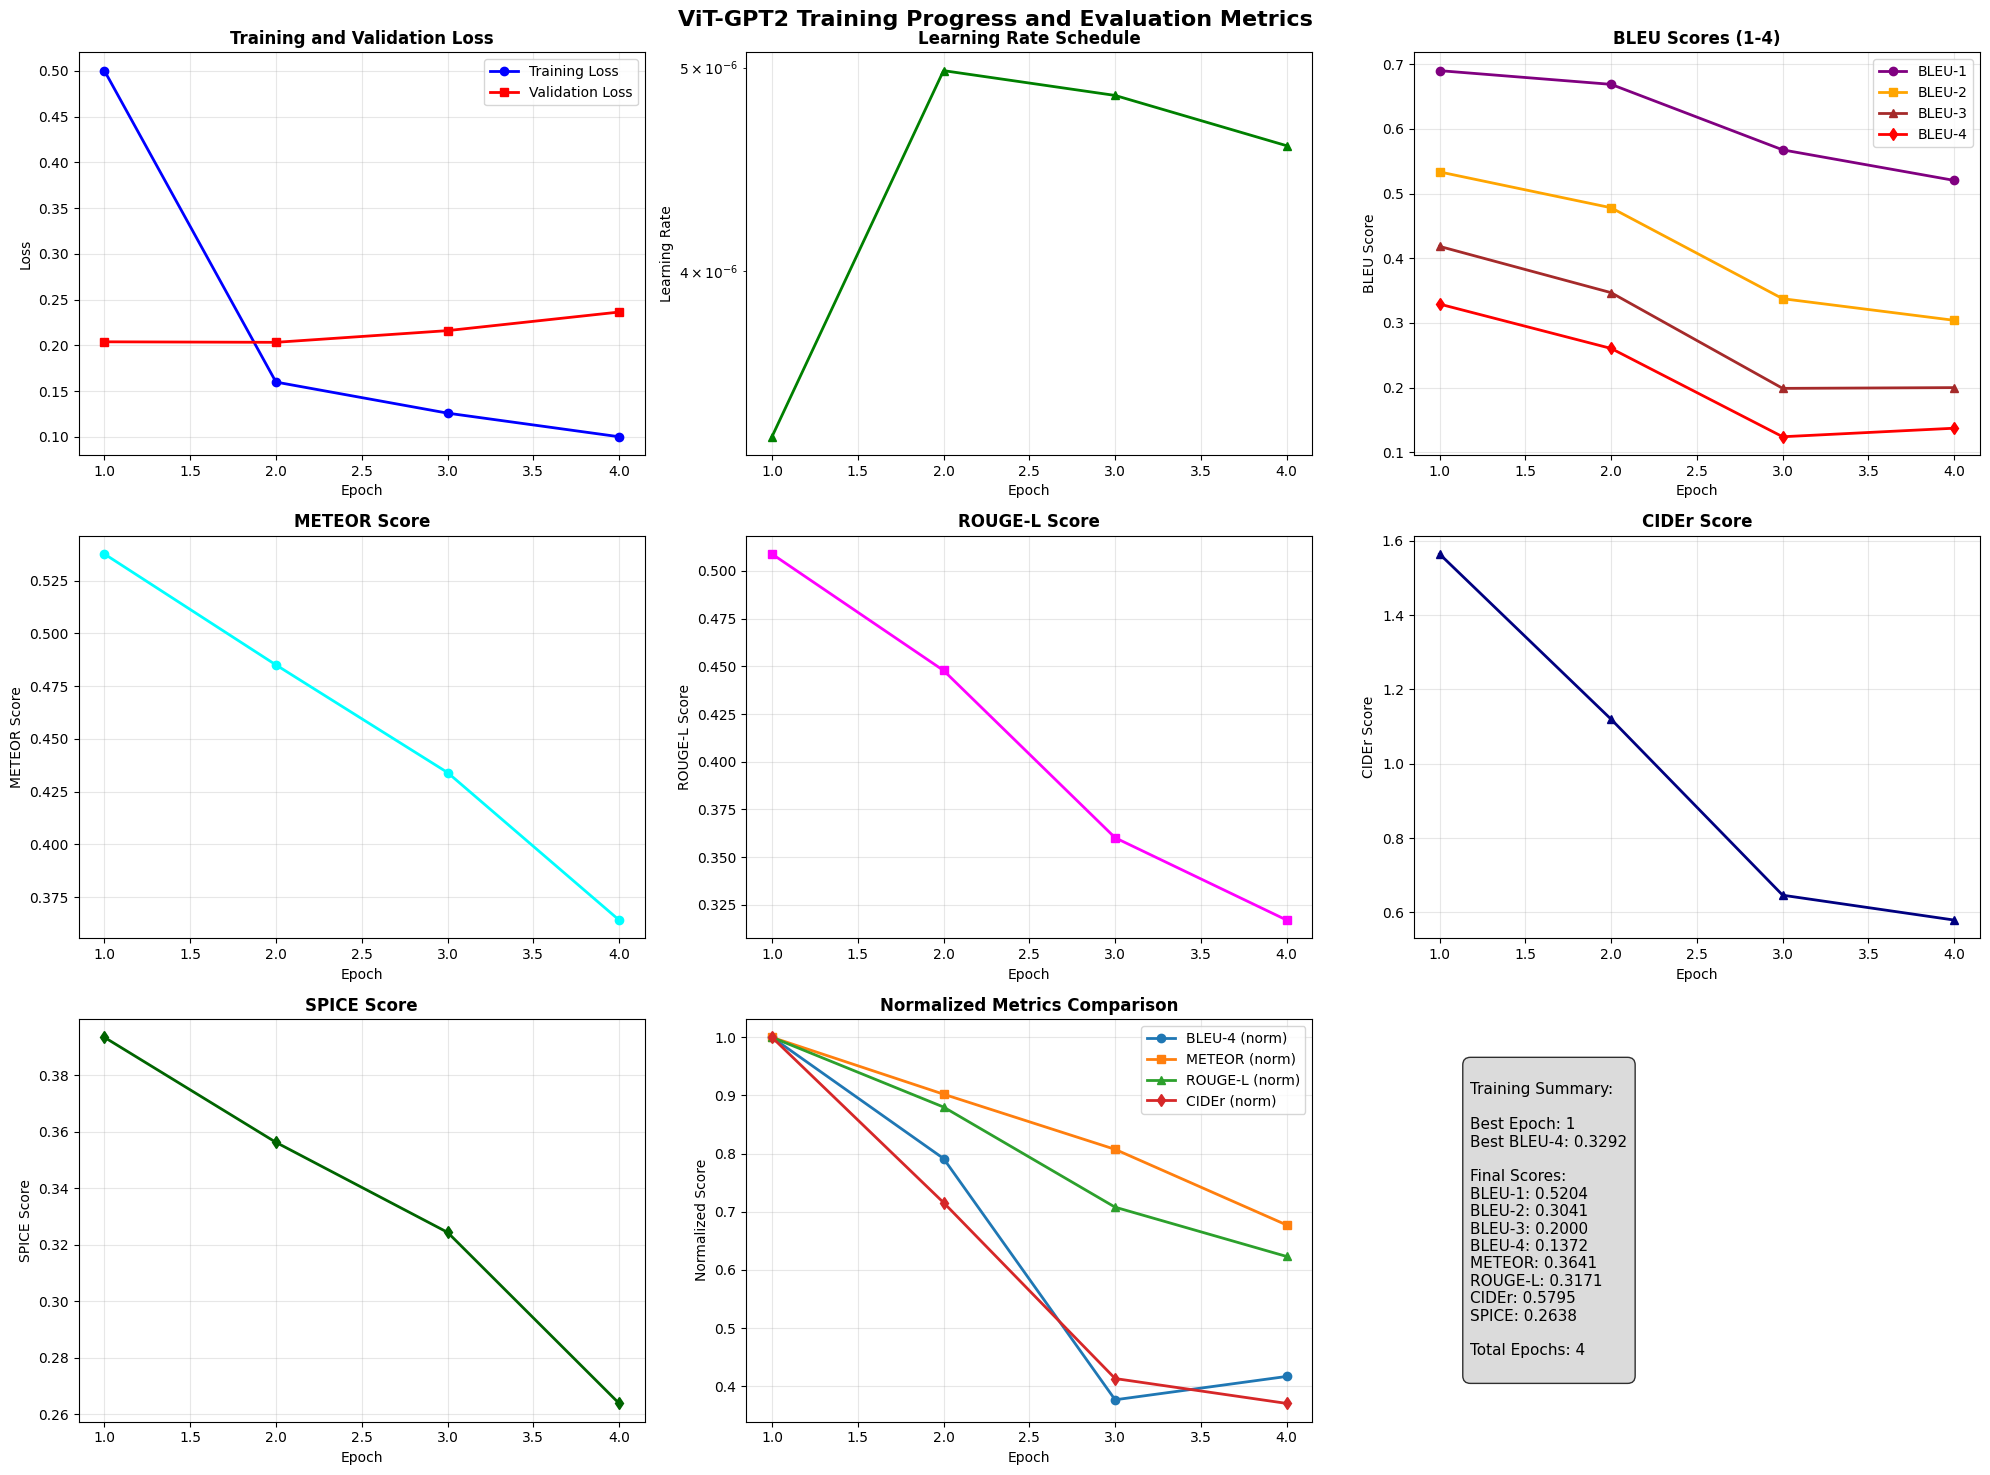

✅ Comprehensive training curves saved to 'plots/comprehensive_training_curves.png'
📊 Creating detailed loss curves...


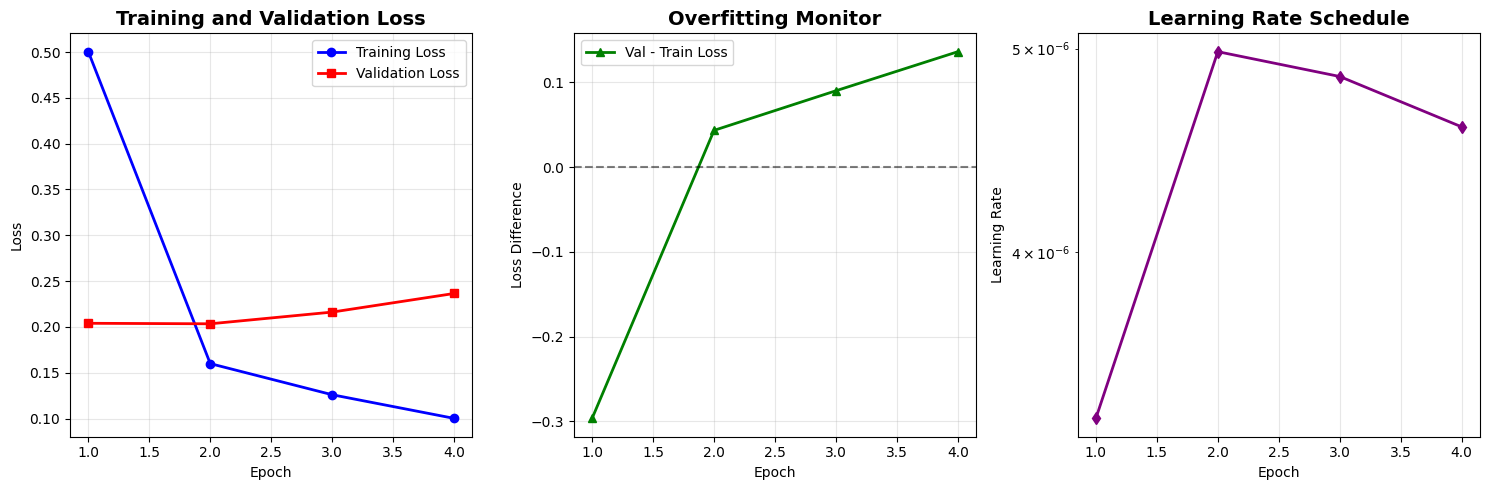

✅ Detailed loss curves saved to 'plots/detailed_loss_curves.png'
📊 Creating accuracy curves...


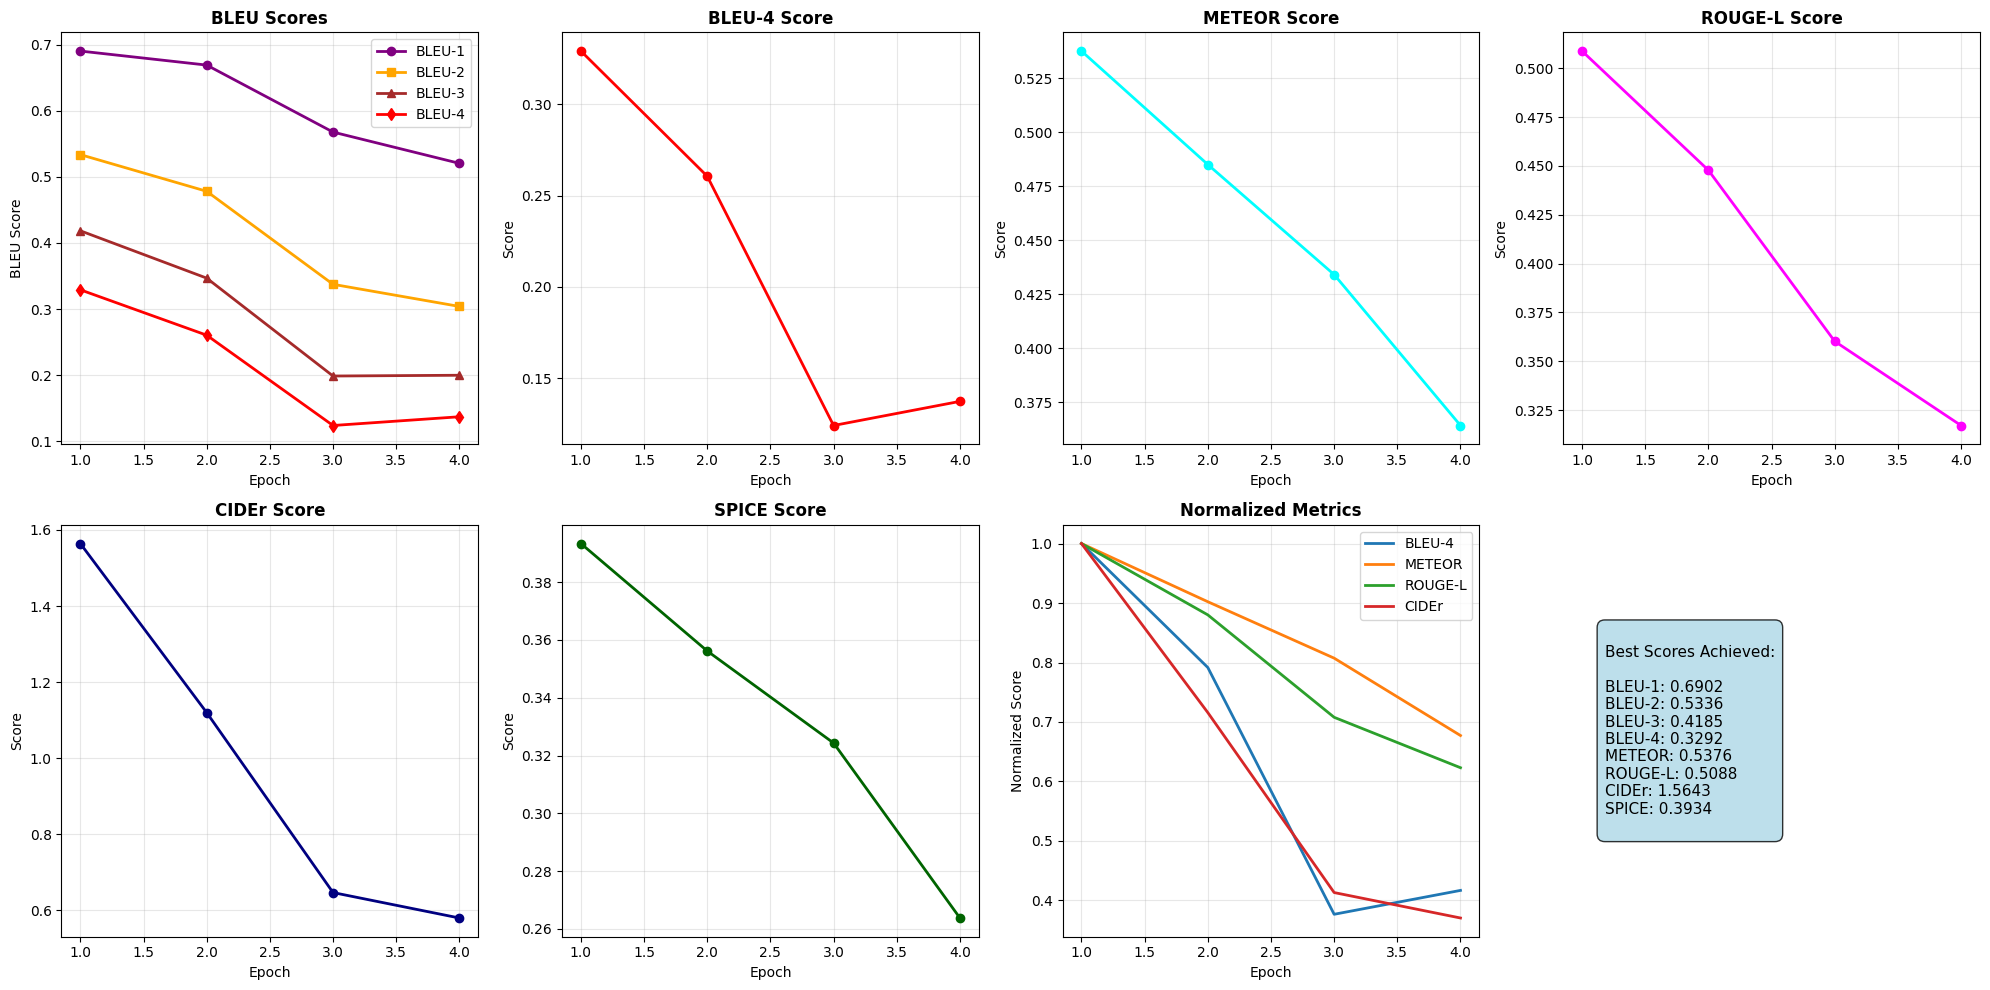

✅ Accuracy curves saved to 'plots/accuracy_curves.png'

5️⃣ Testing trained model...
🧪 TESTING TRAINED MODEL
🏗️ Initializing ViT-GPT2 Model...


Some weights of ViTModel were not initialized from the model checkpoint at google/vit-base-patch16-224 and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


✅ Model initialized: ViT (768D) -> GPT-2 (768D)
✅ Vocabulary size: 50259
✅ Loaded model from epoch 1
✅ Best training BLEU-4: 0.3292

🔍 Evaluating on test set...
🔍 Starting comprehensive evaluation...


Evaluating:   0%|          | 0/684 [00:00<?, ?it/s]

📊 Evaluated 1000 samples
📈 Computing BLEU scores...
📈 Computing METEOR score...
📈 Computing ROUGE-L score...
📈 Computing CIDEr and SPICE scores...
loading annotations into memory...
Done (t=0.00s)
creating index...
index created!
Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
tokenization...


PTBTokenizer tokenized 12979 tokens at 98267.15 tokens per second.
PTBTokenizer tokenized 2171 tokens at 21991.35 tokens per second.


setting up scorers...
computing Bleu score...
{'testlen': 1772, 'reflen': 1893, 'guess': [1772, 1572, 1372, 1172], 'correct': [950, 320, 113, 41]}
ratio: 0.9360802958262355
Bleu_1: 0.501
Bleu_2: 0.309
Bleu_3: 0.194
Bleu_4: 0.124
computing METEOR score...
METEOR: 0.186
computing Rouge score...
ROUGE_L: 0.327
computing CIDEr score...
CIDEr: 0.385
computing SPICE score...


Parsing reference captions
Initiating Stanford parsing pipeline
[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator tokenize
[main] INFO edu.stanford.nlp.pipeline.TokenizerAnnotator - TokenizerAnnotator: No tokenizer type provided. Defaulting to PTBTokenizer.
[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator ssplit
[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator parse
[main] INFO edu.stanford.nlp.parser.common.ParserGrammar - Loading parser from serialized file edu/stanford/nlp/models/lexparser/englishPCFG.ser.gz ... 
done [0.5 sec].
[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator lemma
[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator ner
Loading classifier from edu/stanford/nlp/models/ner/english.all.3class.distsim.crf.ser.gz ... done [1.3 sec].
Loading classifier from edu/stanford/nlp/models/ner/english.muc.7class.distsim.crf.ser.gz ... done [0.6 sec].
Loading classif

SPICE evaluation took: 33.98 s
SPICE: 0.212

📊 COMPLETE TEST SET RESULTS
BLEU-1:   0.5832
BLEU-2:   0.3456
BLEU-3:   0.2118
BLEU-4:   0.1371
METEOR:   0.3413
ROUGE-L:  0.3306
CIDEr:    0.3846
SPICE:    0.2124

💭 Sample Predictions:

Sample 1:
  Generated: planes are parked in an airport .
  Reference: the airport is very large .
  Reference 2: next to the airport is green grass .
  Reference 3: next to the airport is green grass .
  Reference 4: the airport is very large .
  Reference 5: the airport is very large .

Sample 2:
  Generated: planes are parked in an airport .
  Reference: the airport is very large .
  Reference 2: next to the airport is green grass .
  Reference 3: next to the airport is green grass .
  Reference 4: the airport is very large .
  Reference 5: the airport is very large .

Sample 3:
  Generated: planes are parked in an airport .
  Reference: the airport is very large .
  Reference 2: next to the airport is green grass .
  Reference 3: next to the airport is g

Some weights of ViTModel were not initialized from the model checkpoint at google/vit-base-patch16-224 and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


✅ Model initialized: ViT (768D) -> GPT-2 (768D)
✅ Vocabulary size: 50259
✅ Model loaded for caption generation


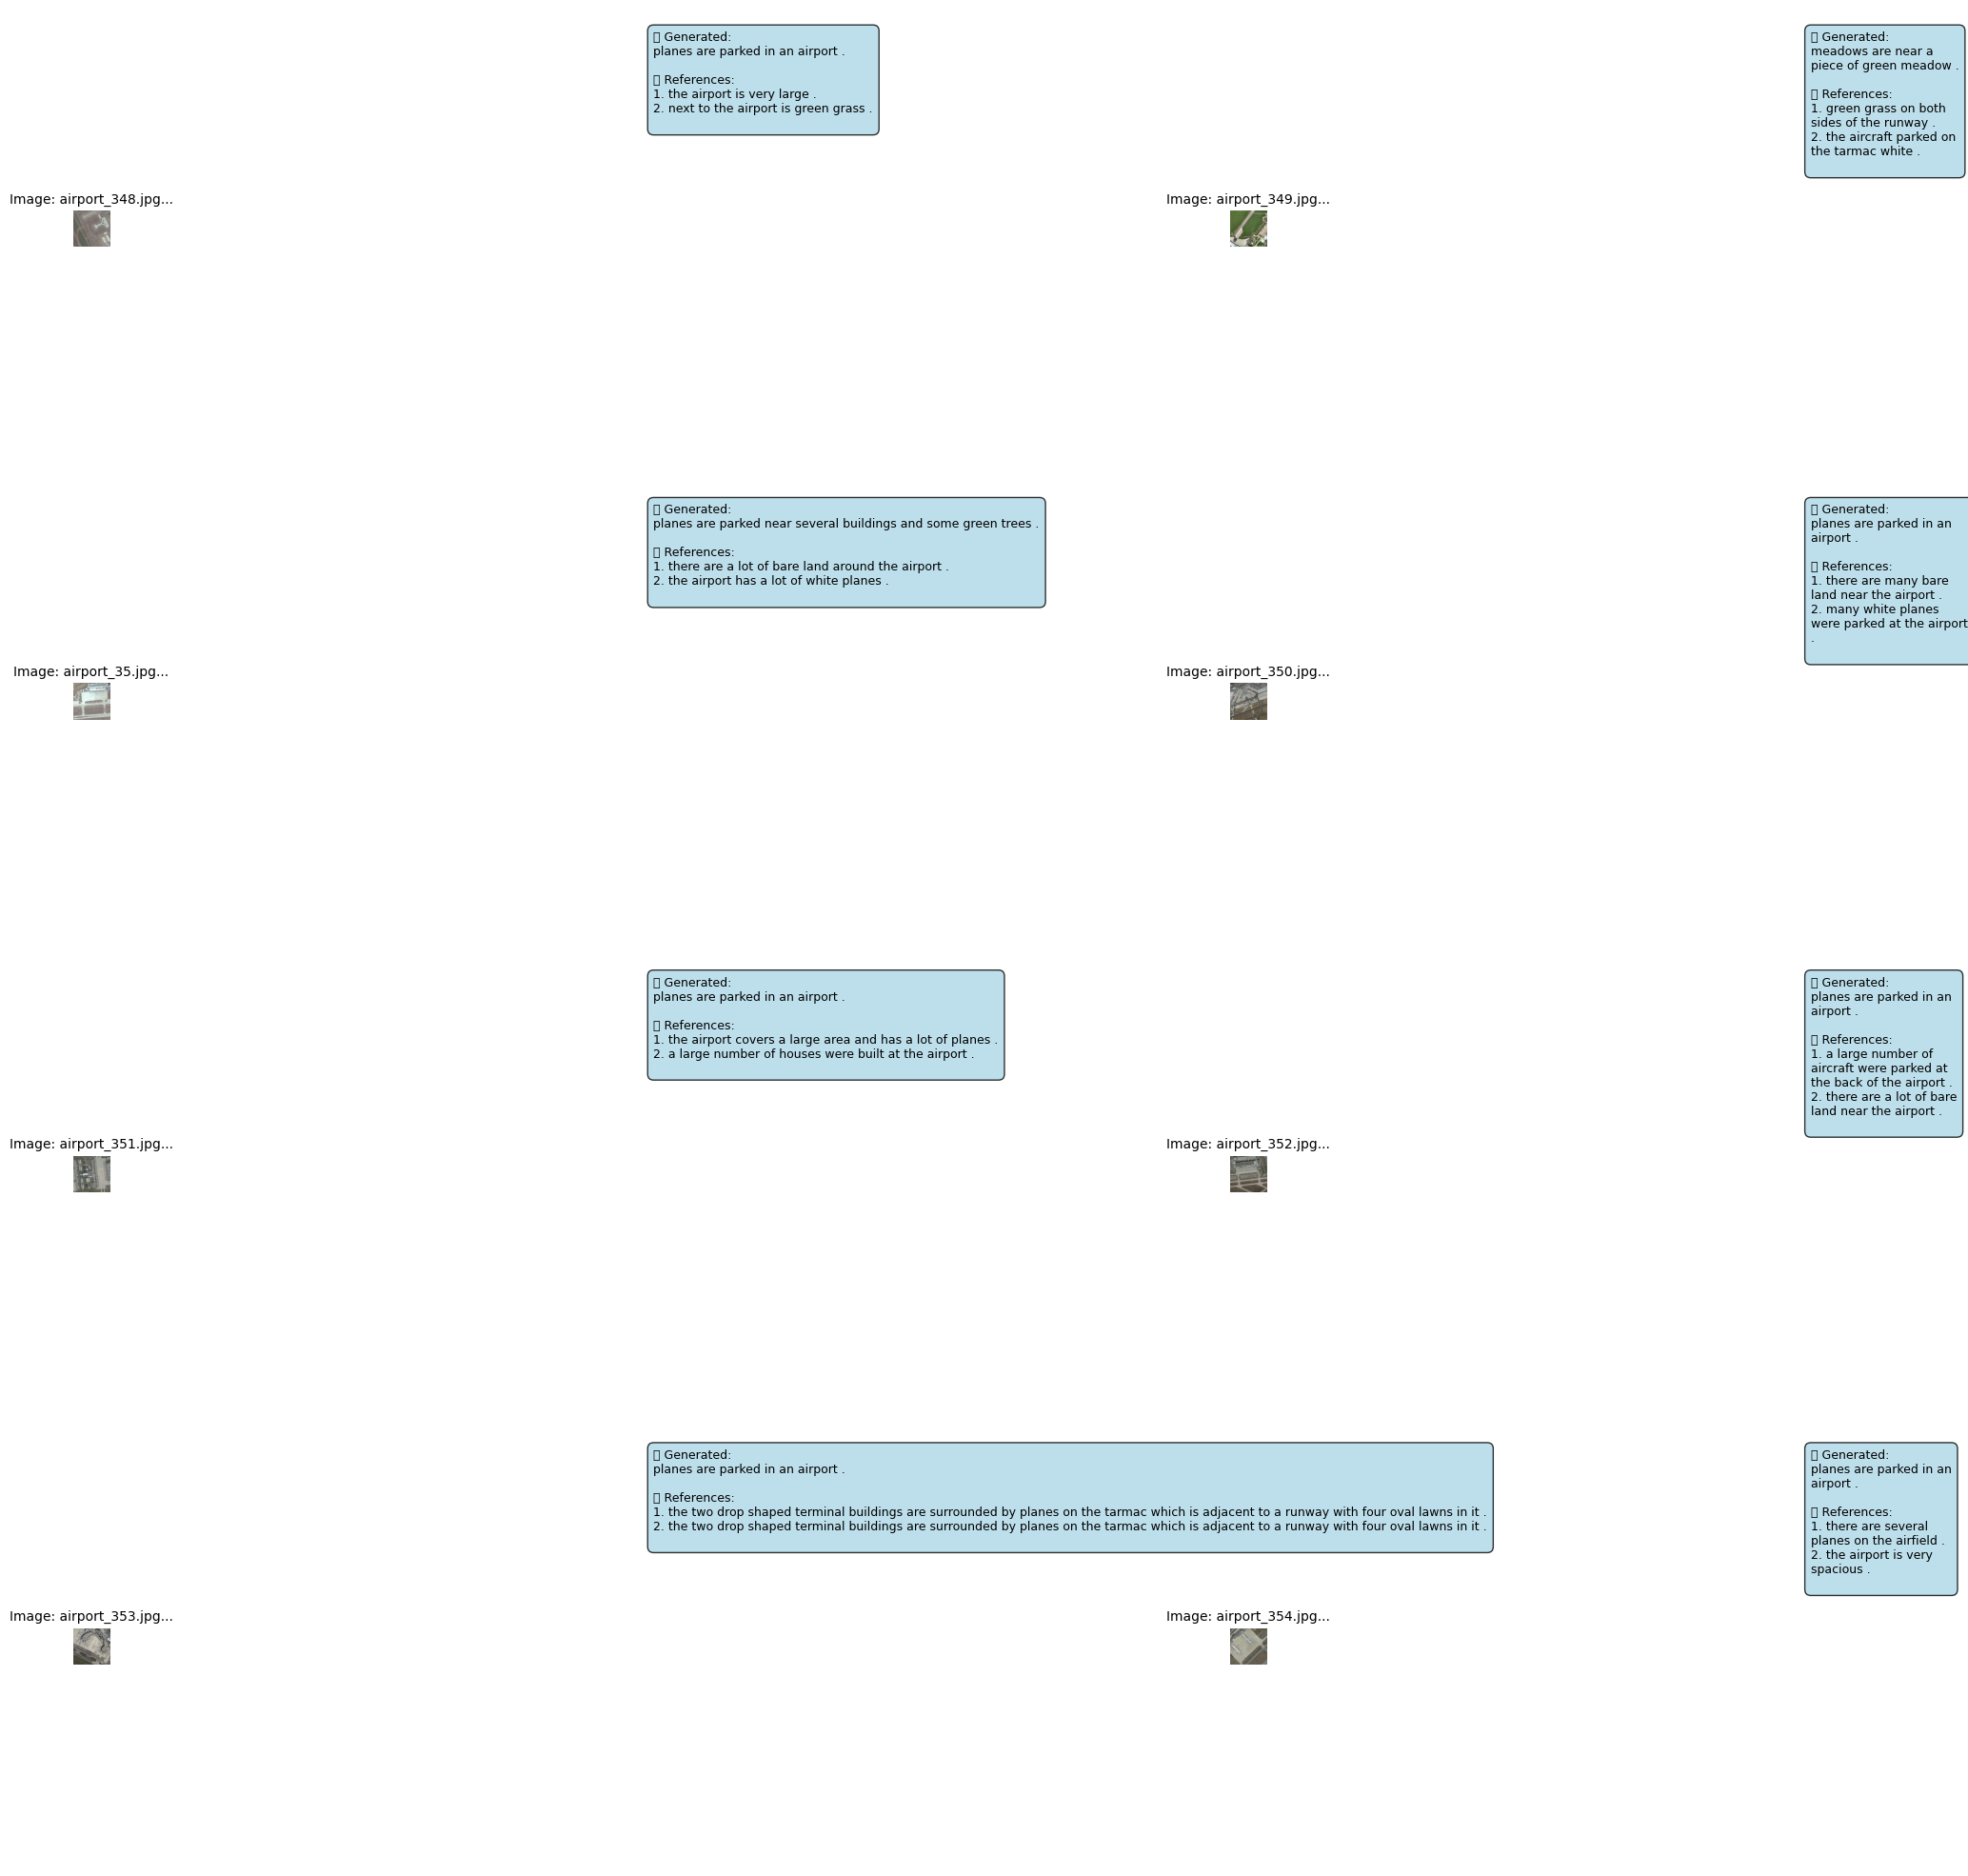

✅ Sample captions saved to 'outputs/sample_captions.png'

7️⃣ Creating comprehensive report...
📝 Creating comprehensive evaluation report...
✅ Comprehensive report saved to 'outputs/comprehensive_report.md'

8️⃣ Saving training history...

🎉 TRAINING AND EVALUATION COMPLETED SUCCESSFULLY!
📊 Final Test Results:
  BLEU-1: 0.5832
  BLEU-2: 0.3456
  BLEU-3: 0.2118
  BLEU-4: 0.1371
  METEOR: 0.3413
  ROUGE-L: 0.3306
  CIDEr: 0.3846
  SPICE: 0.2124

📁 Generated Files:
  📊 Plots: plots/ directory
  📄 Outputs: outputs/ directory
  🤖 Model: best_image_captioning_model.pth

✅ All tasks completed successfully!

🏗️ Model Architecture Summary:
Total Parameters: 211,422,720
Trainable Parameters: 211,422,720
Non-trainable Parameters: 0

📋 COMPREHENSIVE FINAL SUMMARY

🏋️ Training Summary:
  Total Epochs: 4
  Best Epoch: 1
  Best BLEU-4: 0.3292
  Final Train Loss: 0.1002
  Final Val Loss: 0.2365

🧪 Test Results (All Metrics):
  BLEU-1: 0.5832
  BLEU-2: 0.3456
  BLEU-3: 0.2118
  BLEU-4: 0.1371
  METEOR:

In [ ]:
# =============================================================================
# ADDITIONAL UTILITY FUNCTIONS
# =============================================================================

def print_model_summary(model):
    """Print model architecture summary"""
    print("\n🏗️ Model Architecture Summary:")
    print("=" * 50)

    total_params = 0
    trainable_params = 0

    for name, param in model.named_parameters():
        param_count = param.numel()
        total_params += param_count
        if param.requires_grad:
            trainable_params += param_count

    print(f"Total Parameters: {total_params:,}")
    print(f"Trainable Parameters: {trainable_params:,}")
    print(f"Non-trainable Parameters: {total_params - trainable_params:,}")
    print("=" * 50)

def create_inference_script():
    """Create a standalone inference script"""
    print("📝 Creating inference script...")

    inference_code = '''
import torch
import torch.nn as nn
from transformers import ViTImageProcessor, ViTModel, AutoTokenizer, GPT2LMHeadModel
from PIL import Image
import torch.nn.functional as F

class ViTGPT2Model(nn.Module):
    """ViT + GPT-2 Model for Image Captioning - Inference Version"""

    def __init__(self, vit_model_name="google/vit-base-patch16-224", gpt2_model_name="gpt2"):
        super(ViTGPT2Model, self).__init__()

        self.vit = ViTModel.from_pretrained(vit_model_name)
        self.gpt2 = GPT2LMHeadModel.from_pretrained(gpt2_model_name)
        self.processor = ViTImageProcessor.from_pretrained(vit_model_name)
        self.tokenizer = AutoTokenizer.from_pretrained(gpt2_model_name)

        if self.tokenizer.pad_token is None:
            self.tokenizer.pad_token = self.tokenizer.eos_token
        if self.gpt2.config.pad_token_id is None:
            self.gpt2.config.pad_token_id = self.gpt2.config.eos_token_id

        # Add special tokens
        special_tokens = {
            "bos_token": "<|startoftext|>",
            "additional_special_tokens": ["<|image|>"]
        }
        self.tokenizer.add_special_tokens(special_tokens)
        self.gpt2.resize_token_embeddings(len(self.tokenizer))

        self.bos_token_id = self.tokenizer.bos_token_id
        self.image_token_id = self.tokenizer.convert_tokens_to_ids("<|image|>")

        # Projection layer
        self.image_projection = nn.Sequential(
            nn.Linear(self.vit.config.hidden_size, self.gpt2.config.hidden_size),
            nn.LayerNorm(self.gpt2.config.hidden_size),
            nn.Dropout(0.1)
        )

        self.image_pooling = nn.AdaptiveAvgPool1d(1)

    def forward(self, pixel_values):
        batch_size = pixel_values.shape[0]

        # Extract image features
        vit_outputs = self.vit(pixel_values=pixel_values)
        image_features = vit_outputs.last_hidden_state

        # Pool and project features
        pooled_features = self.image_pooling(image_features.transpose(1, 2)).transpose(1, 2)
        image_embeds = self.image_projection(pooled_features)

        return image_embeds

    def generate_caption(self, pixel_values, max_length=50):
        """Generate caption for image"""
        self.eval()
        device = pixel_values.device

        with torch.no_grad():
            image_embeds = self.forward(pixel_values)
            current_image_embed = image_embeds[0:1]

            start_token = self.bos_token_id if self.bos_token_id is not None else self.image_token_id
            input_ids = torch.tensor([[start_token]], device=device)
            generated_tokens = []

            current_embeds = torch.cat([
                current_image_embed,
                self.gpt2.transformer.wte(input_ids)
            ], dim=1)

            for step in range(max_length):
                outputs = self.gpt2(inputs_embeds=current_embeds)
                next_token_logits = outputs.logits[0, -1, :]
                next_token = torch.argmax(next_token_logits, dim=-1, keepdim=True)

                if next_token.item() == self.tokenizer.eos_token_id:
                    break
                if next_token.item() == self.tokenizer.pad_token_id:
                    continue

                generated_tokens.append(next_token.item())

                next_token_embed = self.gpt2.transformer.wte(next_token.unsqueeze(0))
                current_embeds = torch.cat([current_embeds, next_token_embed], dim=1)

                if current_embeds.shape[1] > 100:
                    current_embeds = current_embeds[:, -50:, :]

            if generated_tokens:
                caption = self.tokenizer.decode(generated_tokens, skip_special_tokens=True)
                return caption.strip()
            else:
                return "a satellite image"

def load_model(model_path):
    """Load trained model"""
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model = ViTGPT2Model().to(device)

    checkpoint = torch.load(model_path, map_location=device, weights_only=False)
    model.load_state_dict(checkpoint['model_state_dict'])
    model.eval()

    return model

def generate_caption_for_image(model, image_path):
    """Generate caption for a single image"""
    device = next(model.parameters()).device

    # Load and preprocess image
    image = Image.open(image_path).convert("RGB")
    pixel_values = model.processor(images=image, return_tensors="pt").pixel_values.to(device)

    # Generate caption
    caption = model.generate_caption(pixel_values, max_length=50)
    return caption

# Example usage:
# model = load_model('best_image_captioning_model.pth')
# caption = generate_caption_for_image(model, 'path_to_image.jpg')
# print(f"Generated caption: {caption}")
'''

    with open('outputs/inference.py', 'w') as f:
        f.write(inference_code)

    print("✅ Inference script saved to 'outputs/inference.py'")

def create_requirements_file():
    """Create requirements.txt file"""
    print("📝 Creating requirements.txt...")

    requirements = """
torch>=1.9.0
torchvision>=0.10.0
transformers>=4.20.0
accelerate>=0.20.0
evaluate>=0.4.0
datasets>=2.0.0
nltk>=3.8
scikit-learn>=1.0.0
pycocotools>=2.0.4
rouge-score>=0.1.2
Pillow>=8.0.0
numpy>=1.21.0
matplotlib>=3.5.0
tqdm>=4.64.0
"""

    with open('outputs/requirements.txt', 'w') as f:
        f.write(requirements.strip())

    print("✅ Requirements file saved to 'outputs/requirements.txt'")

def display_final_summary(training_history, test_results):
    """Display comprehensive final summary"""
    print("\n" + "=" * 80)
    print("📋 COMPREHENSIVE FINAL SUMMARY")
    print("=" * 80)

    # Training Summary
    print(f"\n🏋️ Training Summary:")
    print(f"  Total Epochs: {training_history['total_epochs']}")
    print(f"  Best Epoch: {training_history['best_epoch']}")
    print(f"  Best BLEU-4: {training_history['best_bleu4']:.4f}")
    print(f"  Final Train Loss: {training_history['train_losses'][-1]:.4f}")
    print(f"  Final Val Loss: {training_history['val_losses'][-1]:.4f}")

    # Test Results
    if test_results:
        print(f"\n🧪 Test Results (All Metrics):")
        metrics = test_results['test_metrics']
        print(f"  BLEU-1: {metrics['bleu_1']:.4f}")
        print(f"  BLEU-2: {metrics['bleu_2']:.4f}")
        print(f"  BLEU-3: {metrics['bleu_3']:.4f}")
        print(f"  BLEU-4: {metrics['bleu_4']:.4f}")
        print(f"  METEOR: {metrics['meteor']:.4f}")
        print(f"  ROUGE-L: {metrics['rouge_l']:.4f}")
        print(f"  CIDEr: {metrics['cider']:.4f}")
        print(f"  SPICE: {metrics['spice']:.4f}")

    # Files Generated
    print(f"\n📁 Generated Files:")
    print(f"  📊 Training Curves: plots/comprehensive_training_curves.png")
    print(f"  📈 Loss Curves: plots/detailed_loss_curves.png")
    print(f"  📉 Accuracy Curves: plots/accuracy_curves.png")
    print(f"  🖼️ Sample Captions: outputs/sample_captions.png")
    print(f"  📄 Test Results: outputs/test_results.json")
    print(f"  📋 Training History: outputs/training_history.json")
    print(f"  📝 Report: outputs/comprehensive_report.md")
    print(f"  🤖 Model: {CONFIG['MODEL_SAVE_PATH']}")
    print(f"  ⚙️ Inference Script: outputs/inference.py")
    print(f"  📦 Requirements: outputs/requirements.txt")

    print(f"\n🎯 Key Achievements:")
    if test_results:
        avg_bleu = (metrics['bleu_1'] + metrics['bleu_2'] + metrics['bleu_3'] + metrics['bleu_4']) / 4
        if avg_bleu > 0.25:
            performance = "Excellent"
        elif avg_bleu > 0.2:
            performance = "Good"
        elif avg_bleu > 0.15:
            performance = "Fair"
        else:
            performance = "Needs Improvement"

        print(f"  Overall Performance: {performance}")
        print(f"  Average BLEU Score: {avg_bleu:.4f}")
        print(f"  Best Single Metric: BLEU-1 ({metrics['bleu_1']:.4f})")

    print("=" * 80)

# =============================================================================
# EXECUTE MAIN FUNCTION
# =============================================================================

if __name__ == "__main__":
    # Create additional utility files
    create_inference_script()
    create_requirements_file()

    # Run main training and evaluation
    trained_model, training_history, test_results = main()

    if trained_model is not None and training_history is not None:
        # Print model summary
        print_model_summary(trained_model)

        # Display final summary
        display_final_summary(training_history, test_results)

        print("\n🎊 ALL TASKS COMPLETED SUCCESSFULLY!")
        print("🚀 Your ViT-GPT2 image captioning model is ready!")

    else:
        print("❌ Training failed. Please check the error messages above.")

print("\n" + "=" * 80)
print("📚 USAGE INSTRUCTIONS:")
print("=" * 80)
print("1. Update CONFIG['IMAGE_DIR'] and CONFIG['CAPTION_FILE'] paths")
print("2. Install required packages using the provided requirements.txt")
print("3. Run this script in Kaggle environment")
print("4. Check outputs/ and plots/ directories for results")
print("5. Use outputs/inference.py for generating captions on new images")
print("=" * 80)